# MODELO PREDICTIVO FIBROPRED

In [1]:
!pip install openpyxl


In [2]:
import pandas as pd

In [3]:
df = pd.read_excel("/content/FibroPredCODIFICADA.xlsx")

# PREPROCESAMOS LOS DATOS


In [4]:
df.head()

,Pedigree,Sex,FamilialvsSporadic,COD NUMBER,Age at diagnosis,Binary diagnosis,Final diagnosis,TOBACCO,Detail,Comorbidities,...,Type of family history,1st degree relative,2nd degree relative,More than 1 relative,Genetic mutation studied in patient,Mutation Type,Severity of telomere shortening,Severity of telomere shortening - Transform 4,Progressive disease,ProgressiveDisease
0,1,Male,Familial,13820545,70.0,No IPF,3,2,Tobacco-associated,0,...,CPFE,1,0,0,1.0,NaN,3.0,6.0,1.0,1.0
1,2,Male,Familial,12974225,66.0,No IPF,8,2,NaN,1,...,Unspecified PF,1,0,1,1.0,NaN,1.0,4.0,1.0,1.0
2,3,Male,Familial,13551148,59.0,No IPF,3,2,Tobacco-associated,0,...,Unspecified PF,1,0,0,1.0,NaN,3.0,6.0,1.0,1.0
3,4,Female,Familial,13597482,66.0,IPF,1,0,Organizing,1,...,NaN,1,0,0,0.0,NaN,4.0,3.0,1.0,1.0
4,5,Male,Familial,10572432,72.0,IPF,1,0,NaN,1,...,"IPF, Dendriform ossification, GPA, IPAF",1,0,1,1.0,TERT Exon 2b/HT/c.835G>A / p.Ala279Thr/ rs6174...,3.0,6.0,1.0,1.0


In [5]:
num_columnas = df.shape[1]
print(f"El DataFrame tiene {num_columnas} columnas.")

El DataFrame tiene 77 columnas.


# ELIMINAMOS VARIABLES NO IMPORTANTES

In [6]:

columnas_a_eliminar = ["Pedigree", "Severity of telomere shortening - Transform 4","Cause of death","Pathology Pattern Binary", "Pathology pattern UIP, probable or CHP","Transplantation date", "Death", "Extras AP", "Extra", "COD NUMBER", "Date of death", "FVC (L) at diagnosis", "FVC (L) 1 year after diagnosis", "ProgressiveDisease"]
df = df.drop(columns=columnas_a_eliminar)
print(df.head())


      Sex FamilialvsSporadic  Age at diagnosis Binary diagnosis  \
0    Male           Familial              70.0           No IPF   
1    Male           Familial              66.0           No IPF   
2    Male           Familial              59.0           No IPF   
3  Female           Familial              66.0              IPF   
4    Male           Familial              72.0              IPF   

   Final diagnosis  TOBACCO              Detail  Comorbidities  \
0                3        2  Tobacco-associated              0   
1                8        2                 NaN              1   
2                3        2  Tobacco-associated              0   
3                1        0          Organizing              1   
4                1        0                 NaN              1   

  Radiological Pattern               Detail on NON UIP  ...  \
0                  UIP                             NaN  ...   
1         Probable UIP                             NaN  ...   
2          

In [7]:
num_columnas = df.shape[1]
print(f"El DataFrame tiene {num_columnas} columnas.")

El DataFrame tiene 63 columnas.


# CREAR NUEVAS COLUMNAS PARA CALCULAR EL PROGRESO

In [8]:
# K means --> missings del FVC
df['FVC (%) 1 year after diagnosis'] = df['FVC (%) 1 year after diagnosis'].fillna(df['FVC (%) 1 year after diagnosis'].mean())
df['FVC (%) 1 year after diagnosis']

,FVC (%) 1 year after diagnosis
0,67.0
1,53.0
2,88.4
3,53.6
4,78.6
...,...
217,57.0
218,115.0
219,105.0
220,109.0


In [9]:
# K means --> missings del DLCO
df['DLCO (%) 1 year after diagnosis'] = df['DLCO (%) 1 year after diagnosis'].fillna(df['DLCO (%) 1 year after diagnosis'].mean())
df['DLCO (%) 1 year after diagnosis']

,DLCO (%) 1 year after diagnosis
0,27.0
1,53.0
2,28.4
3,43.6
4,58.6
...,...
217,38.0
218,68.0
219,77.0
220,67.0


In [10]:
df['FVC_difference(%)'] = df['FVC (%) 1 year after diagnosis'] - df['FVC (%) at diagnosis']

# Verifica el resultado
print(df[['FVC (%) 1 year after diagnosis', 'FVC (%) at diagnosis', 'FVC_difference(%)']].head())

   FVC (%) 1 year after diagnosis  FVC (%) at diagnosis  FVC_difference(%)
0                            67.0                  79.9              -12.9
1                            53.0                  75.4              -22.4
2                            88.4                  83.8                4.6
3                            53.6                  95.5              -41.9
4                            78.6                  74.9                3.7


In [11]:
df['DLCO_difference(%)'] = df['DLCO (%) 1 year after diagnosis'] - df['DLCO (%) at diagnosis']

# Verifica el resultado
print(df[['DLCO (%) 1 year after diagnosis', 'DLCO (%) at diagnosis', 'DLCO_difference(%)']].head())

   DLCO (%) 1 year after diagnosis  DLCO (%) at diagnosis  DLCO_difference(%)
0                             27.0                   43.4               -16.4
1                             53.0                   48.1                 4.9
2                             28.4                   32.6                -4.2
3                             43.6                   64.5               -20.9
4                             58.6                   69.0               -10.4


In [12]:
columnas_a_eliminar = ["FVC (%) 1 year after diagnosis", "FVC (%) at diagnosis", "DLCO (%) 1 year after diagnosis", "DLCO (%) at diagnosis"]
df = df.drop(columns=columnas_a_eliminar)

In [13]:
print(df.head())

      Sex FamilialvsSporadic  Age at diagnosis Binary diagnosis  \
0    Male           Familial              70.0           No IPF   
1    Male           Familial              66.0           No IPF   
2    Male           Familial              59.0           No IPF   
3  Female           Familial              66.0              IPF   
4    Male           Familial              72.0              IPF   

   Final diagnosis  TOBACCO              Detail  Comorbidities  \
0                3        2  Tobacco-associated              0   
1                8        2                 NaN              1   
2                3        2  Tobacco-associated              0   
3                1        0          Organizing              1   
4                1        0                 NaN              1   

  Radiological Pattern               Detail on NON UIP  ...  \
0                  UIP                             NaN  ...   
1         Probable UIP                             NaN  ...   
2          

# GESTIÓN MISSINGS


In [14]:
# Identificar i comptar els missings
missings = df.isnull().sum()
print(missings)

Sex                                  0
FamilialvsSporadic                   0
Age at diagnosis                     1
Binary diagnosis                     0
Final diagnosis                      0
                                  ... 
Mutation Type                      199
Severity of telomere shortening     70
Progressive disease                 10
FVC_difference(%)                    2
DLCO_difference(%)                   2
Length: 61, dtype: int64


In [15]:
# Escribir el DataFrame preprocesado a un nuevo archivo CSV
df.to_excel("FibroPredCODIFICADA_preprocesada.xlsx",  index=False)

# Cargar el DataFrame preprocesado desde el archivo CSV
df_preprocesado = pd.read_excel("FibroPredCODIFICADA_preprocesada.xlsx")

In [16]:
import numpy as np

# Reemplazar 'n/a' por NaN en todo el DataFrame
df_preprocesado.replace('n/a', np.nan, inplace=True)

# Reemplazar otros valores que podrían indicar "nulo" o "vacío"
df_preprocesado.replace(['null', 'NA', 'na',''], np.nan, inplace=True)

# Calcular los missings por fila para las filas de la 1 a la 220
missing_values_per_row = df_preprocesado.iloc[1:223, :].isnull().sum(axis=1)

# Filtrar y mostrar solo las filas con más de 20 valores faltantes
rows_with_missing_more_than_20 = missing_values_per_row[missing_values_per_row > 20]
print(rows_with_missing_more_than_20)


129    24
130    37
dtype: int64


In [17]:
# Eliminar las filas con más de 20 valores faltantes
df_cleaned = df_preprocesado.drop(index=rows_with_missing_more_than_20.index)

# Verificar el DataFrame limpio
print(f"\nNúmero de filas después de eliminar las filas con más de 20 valores faltantes: {df_cleaned.shape[0]}")
# Calcular los missings por fila para las filas de la 1 a la 220
missing_values_per_row = df_cleaned.iloc[1:223, :].isnull().sum(axis=1)

# Eliminamos variable no relevante
df_cleaned = df_cleaned.drop(columns = 'Age at diagnosis')
df_cleaned = df_cleaned.drop(columns = 'Multidsciplinary committee')

# Filtrar y mostrar solo las filas con más de 20 valores faltantes
rows_with_missing_more_than_20 = missing_values_per_row[missing_values_per_row > 20]
print(rows_with_missing_more_than_20)


Número de filas después de eliminar las filas con más de 20 valores faltantes: 220
Series([], dtype: int64)


In [18]:
# No detalle --> missings del Detail
df_cleaned['Detail'] = df_cleaned['Detail'].fillna('No detalle')

df_cleaned

,Sex,FamilialvsSporadic,Binary diagnosis,Final diagnosis,TOBACCO,Detail,Comorbidities,Radiological Pattern,Detail on NON UIP,Biopsy,...,Type of family history,1st degree relative,2nd degree relative,More than 1 relative,Genetic mutation studied in patient,Mutation Type,Severity of telomere shortening,Progressive disease,FVC_difference(%),DLCO_difference(%)
0,Male,Familial,No IPF,3,2,Tobacco-associated,0,UIP,NaN,0.0,...,CPFE,1,0,0,1.0,NaN,3.0,1.0,-12.9,-16.4
1,Male,Familial,No IPF,8,2,No detalle,1,Probable UIP,NaN,0.0,...,Unspecified PF,1,0,1,1.0,NaN,1.0,1.0,-22.4,4.9
2,Male,Familial,No IPF,3,2,Tobacco-associated,0,UIP,NaN,1.0,...,Unspecified PF,1,0,0,1.0,NaN,3.0,1.0,4.6,-4.2
3,Female,Familial,IPF,1,0,Organizing,1,Non UIP,Fibrosing Organizing Pneumonia,1.0,...,NaN,1,0,0,0.0,NaN,4.0,1.0,-41.9,-20.9
4,Male,Familial,IPF,1,0,No detalle,1,Probable UIP,NaN,0.0,...,"IPF, Dendriform ossification, GPA, IPAF",1,0,1,1.0,TERT Exon 2b/HT/c.835G>A / p.Ala279Thr/ rs6174...,3.0,1.0,3.7,-10.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,Female,Sporadic,No IPF,6,0,"Aviary, Fungi",1,Non UIP,NaN,2.0,...,No history,0,0,0,0.0,NaN,NaN,0.0,6.0,6.0
218,Female,Sporadic,No IPF,6,2,Aviary,1,Non UIP,NaN,0.0,...,No history,0,0,0,0.0,NaN,NaN,0.0,5.0,22.0
219,Female,Sporadic,No IPF,6,0,Aviary,1,Non UIP,NaN,0.0,...,No history,0,0,0,0.0,NaN,NaN,0.0,2.0,8.0
220,Female,Sporadic,No IPF,6,0,Unknown,1,Non UIP,NaN,0.0,...,No history,0,0,0,0.0,NaN,NaN,0.0,4.0,12.0


In [19]:
# Indeterminate --> missings del Radiological Pattern
df_cleaned['Radiological Pattern'] = df_cleaned['Radiological Pattern'].fillna('Indeterminate')

df_cleaned

,Sex,FamilialvsSporadic,Binary diagnosis,Final diagnosis,TOBACCO,Detail,Comorbidities,Radiological Pattern,Detail on NON UIP,Biopsy,...,Type of family history,1st degree relative,2nd degree relative,More than 1 relative,Genetic mutation studied in patient,Mutation Type,Severity of telomere shortening,Progressive disease,FVC_difference(%),DLCO_difference(%)
0,Male,Familial,No IPF,3,2,Tobacco-associated,0,UIP,NaN,0.0,...,CPFE,1,0,0,1.0,NaN,3.0,1.0,-12.9,-16.4
1,Male,Familial,No IPF,8,2,No detalle,1,Probable UIP,NaN,0.0,...,Unspecified PF,1,0,1,1.0,NaN,1.0,1.0,-22.4,4.9
2,Male,Familial,No IPF,3,2,Tobacco-associated,0,UIP,NaN,1.0,...,Unspecified PF,1,0,0,1.0,NaN,3.0,1.0,4.6,-4.2
3,Female,Familial,IPF,1,0,Organizing,1,Non UIP,Fibrosing Organizing Pneumonia,1.0,...,NaN,1,0,0,0.0,NaN,4.0,1.0,-41.9,-20.9
4,Male,Familial,IPF,1,0,No detalle,1,Probable UIP,NaN,0.0,...,"IPF, Dendriform ossification, GPA, IPAF",1,0,1,1.0,TERT Exon 2b/HT/c.835G>A / p.Ala279Thr/ rs6174...,3.0,1.0,3.7,-10.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,Female,Sporadic,No IPF,6,0,"Aviary, Fungi",1,Non UIP,NaN,2.0,...,No history,0,0,0,0.0,NaN,NaN,0.0,6.0,6.0
218,Female,Sporadic,No IPF,6,2,Aviary,1,Non UIP,NaN,0.0,...,No history,0,0,0,0.0,NaN,NaN,0.0,5.0,22.0
219,Female,Sporadic,No IPF,6,0,Aviary,1,Non UIP,NaN,0.0,...,No history,0,0,0,0.0,NaN,NaN,0.0,2.0,8.0
220,Female,Sporadic,No IPF,6,0,Unknown,1,Non UIP,NaN,0.0,...,No history,0,0,0,0.0,NaN,NaN,0.0,4.0,12.0


In [20]:
# No detail --> missings del Detail on NON UIP
df_cleaned['Detail on NON UIP'] = df_cleaned['Detail on NON UIP'].fillna('No detail')
df_cleaned['Detail on NON UIP']

,Detail on NON UIP
0,No detail
1,No detail
2,No detail
3,Fibrosing Organizing Pneumonia
4,No detail
...,...
217,No detail
218,No detail
219,No detail
220,No detail


In [21]:
# 0 --> missings del Biopsy
df_cleaned['Biopsy'] = df_cleaned['Biopsy'].fillna('0')
df_cleaned['Biopsy']

,Biopsy
0,0.0
1,0.0
2,1.0
3,1.0
4,0.0
...,...
217,2.0
218,0.0
219,0.0
220,0.0


In [22]:
# Unknown --> missings del Pathology pattern
df_cleaned['Pathology pattern'] = df_cleaned['Pathology pattern'].fillna('Unknown')
df_cleaned['Pathology pattern']


,Pathology pattern
0,0
1,Necrotizing_vasculitis
2,UIP
3,UIP
4,0
...,...
217,CHP
218,CHP
219,CHP
220,CHP


In [23]:
# No data --> missings del Treatment
df_cleaned['Treatment'] = df_cleaned['Treatment'].fillna('No data')
df_cleaned['Treatment'] = df_cleaned['Treatment'].replace('No Data', 'No data')
df_cleaned['Treatment']

,Treatment
0,Pirfenidone
1,"Pirfenidone, Prednisone, MMF, Rituximab, Tacro..."
2,"Nintedanib, Pirfenidone"
3,"Nintedanib, pirfenidone, prednisone"
4,Pirfenidone
...,...
217,Prednisone
218,"Prednisone, MMF (2)"
219,"Prednisone, MMF (2)"
220,"Prednisone, MMF (2)"


In [24]:
# K moda --> missings del Extrapulmonary affectation
df_cleaned['Extrapulmonary affectation'] = df_cleaned['Extrapulmonary affectation'].fillna(df_cleaned['Extrapulmonary affectation'].mode()[0])
df_cleaned['Extrapulmonary affectation']

,Extrapulmonary affectation
0,0.0
1,0.0
2,0.0
3,1.0
4,1.0
...,...
217,0.0
218,0.0
219,0.0
220,0.0


In [25]:
# Unknown --> missings del Type of telomeric extrapulmonary affectation
df_cleaned['Type of telomeric extrapulmonary affectation'] = df_cleaned['Type of telomeric extrapulmonary affectation'].fillna('Unknown')
df_cleaned['Type of telomeric extrapulmonary affectation']


,Type of telomeric extrapulmonary affectation
0,None
1,None
2,None
3,"Neutrophilia, Lymphopenia"
4,Thalassemia
...,...
217,None
218,None
219,None
220,None


In [26]:
# Unknown --> missings del Severity of telomere shortening
df_cleaned['Severity of telomere shortening'] = df_cleaned['Severity of telomere shortening'].fillna('Unknown')
df_cleaned['Severity of telomere shortening']

,Severity of telomere shortening
0,3.0
1,1.0
2,3.0
3,4.0
4,3.0
...,...
217,Unknown
218,Unknown
219,Unknown
220,Unknown


In [27]:
# K moda --> missings del Associated lung cancer
df_cleaned['Associated lung cancer'] = df_cleaned['Associated lung cancer'].fillna(df_cleaned['Associated lung cancer'].mode()[0])
df_cleaned['Associated lung cancer']

,Associated lung cancer
0,0.0
1,0.0
2,0.0
3,1.0
4,0.0
...,...
217,0.0
218,0.0
219,0.0
220,0.0


In [28]:
# K moda --> missings del Other cancer
df_cleaned['Other cancer'] = df_cleaned['Other cancer'].fillna(df_cleaned['Other cancer'].mode()[0])
df_cleaned['Other cancer']

,Other cancer
0,0.0
1,1.0
2,0.0
3,0.0
4,0.0
...,...
217,0.0
218,0.0
219,0.0
220,0.0


In [29]:
# Unknown --> missings del Type of neoplasia
df_cleaned['Type of neoplasia'] = df_cleaned['Type of neoplasia'].fillna('Unknown')
df_cleaned['Type of neoplasia']

,Type of neoplasia
0,None
1,Kaposi Sarcoma
2,None
3,Lung ADK
4,None
...,...
217,None
218,None
219,None
220,None


In [30]:
# Unknown --> missings del Hematological abnormality before diagnosis
df_cleaned['Hematological abnormality before diagnosis'] = df_cleaned['Hematological abnormality before diagnosis'].fillna('Unknown')
df_cleaned['Hematological abnormality before diagnosis']

,Hematological abnormality before diagnosis
0,None
1,Yes
2,None
3,Yes
4,None
...,...
217,None
218,None
219,None
220,None


In [31]:
# K moda --> missings del Blood count abnormality at diagnosis
df_cleaned['Blood count abnormality at diagnosis'] = df_cleaned['Blood count abnormality at diagnosis'].fillna(df_cleaned['Blood count abnormality at diagnosis'].mode()[0])
df_cleaned['Blood count abnormality at diagnosis']

,Blood count abnormality at diagnosis
0,0.0
1,1.0
2,0.0
3,1.0
4,0.0
...,...
217,0.0
218,0.0
219,0.0
220,0.0


In [32]:
# K moda --> missings del Anemia
df_cleaned['Anemia'] = df_cleaned['Anemia'].fillna(df_cleaned['Anemia'].mode()[0])
df_cleaned['Anemia']

# K moda --> missings del Thrombocytopenia
df_cleaned['Thrombocytopenia'] = df_cleaned['Thrombocytopenia'].fillna(df_cleaned['Thrombocytopenia'].mode()[0])
df_cleaned['Thrombocytopenia']

# K moda --> missings del Thrombocytosis
df_cleaned['Thrombocytosis'] = df_cleaned['Thrombocytosis'].fillna(df_cleaned['Thrombocytosis'].mode()[0])
df_cleaned['Thrombocytosis']

# K moda --> missings del Lymphocytosis
df_cleaned['Lymphocytosis'] = df_cleaned['Lymphocytosis'].fillna(df_cleaned['Lymphocytosis'].mode()[0])
df_cleaned['Lymphocytosis']

# K moda --> missings del Lymphopenia
df_cleaned['Lymphopenia'] = df_cleaned['Lymphopenia'].fillna(df_cleaned['Lymphopenia'].mode()[0])
df_cleaned['Lymphopenia']

# K moda --> missings del Neutrophilia
df_cleaned['Neutrophilia'] = df_cleaned['Neutrophilia'].fillna(df_cleaned['Neutrophilia'].mode()[0])
df_cleaned['Neutrophilia']

# K moda --> missings del Neutropenia
df_cleaned['Neutropenia'] = df_cleaned['Neutropenia'].fillna(df_cleaned['Neutropenia'].mode()[0])
df_cleaned['Neutropenia']

# K moda --> missings del Leukocytosis
df_cleaned['Leukocytosis'] = df_cleaned['Leukocytosis'].fillna(df_cleaned['Leukocytosis'].mode()[0])
df_cleaned['Leukocytosis']


# K moda --> missings del Leukopenia
df_cleaned['Leukopenia'] = df_cleaned['Leukopenia'].fillna(df_cleaned['Leukopenia'].mode()[0])
df_cleaned['Leukopenia']

,Leukopenia
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
217,0.0
218,0.0
219,0.0
220,0.0


In [33]:
# Unknown --> missings del Liver abnormality before diagnosis
df_cleaned['Liver abnormality before diagnosis'] = df_cleaned['Liver abnormality before diagnosis'].fillna('Unknown')
df_cleaned['Liver abnormality before diagnosis']

,Liver abnormality before diagnosis
0,Yes
1,Yes
2,No
3,No
4,Unknown
...,...
217,No
218,No
219,No
220,No


In [34]:
# Unknown --> missings del Liver abnormality
df_cleaned['Liver abnormality'] = df_cleaned['Liver abnormality'].fillna('Unknown')
df_cleaned['Liver abnormality']

,Liver abnormality
0,Yes
1,Yes
2,Yes
3,Yes
4,No
...,...
217,No
218,No
219,No
220,No


In [35]:
# None --> missings del Type of liver abnormality
df_cleaned['Type of liver abnormality'] = df_cleaned['Type of liver abnormality'].fillna('None')
df_cleaned['Type of liver abnormality']

# Unknown --> missings del Liver disease
df_cleaned['Liver disease'] = df_cleaned['Liver disease'].fillna('Unknown')
df_cleaned['Liver disease']

# None --> missings del Identified Infection
df_cleaned['Identified Infection'] = df_cleaned['Identified Infection'].fillna('None')
df_cleaned['Identified Infection']


,Identified Infection
0,None
1,None
2,None
3,None
4,None
...,...
217,None
218,None
219,None
220,None


In [36]:
# Reemplazar el valor -9 por Unknown en la columna 'Diagnosis after Biopsy'
df_cleaned['Diagnosis after Biopsy'] = df_cleaned['Diagnosis after Biopsy'].replace(-9, "Unknown")

# Verificar los cambios
print(df_cleaned['Diagnosis after Biopsy'].value_counts())

Unknown    131
1.0         76
0.0         13
Name: Diagnosis after Biopsy, dtype: int64


In [37]:
# Reemplazar el valor 3 por 1 en la columna 'RadioWorsening2y'
df_cleaned['RadioWorsening2y'] = df_cleaned['RadioWorsening2y'].replace(3, 1)

# Verificar los cambios
print(df_cleaned['RadioWorsening2y'].value_counts())

0.0    141
1.0     79
Name: RadioWorsening2y, dtype: int64


In [38]:
# No history --> missings del Type of family history
df_cleaned['Type of family history'] = df_cleaned['Type of family history'].fillna('No history')
df_cleaned['Type of family history']

,Type of family history
0,CPFE
1,Unspecified PF
2,Unspecified PF
3,No history
4,"IPF, Dendriform ossification, GPA, IPAF"
...,...
217,No history
218,No history
219,No history
220,No history


In [39]:
# Reemplazar el valor 3 por 1 en la columna 'More than 1 relative'
df_cleaned['More than 1 relative'] = df_cleaned['More than 1 relative'].replace(-9, 0)

# Verificar los cambios
print(df_cleaned['More than 1 relative'].value_counts())

0    171
1     49
Name: More than 1 relative, dtype: int64


In [40]:
df_cleaned = df_cleaned[~df_cleaned['Progressive disease'].isna()]

In [41]:
# Creamos nueva columna 'Mutation_Summary'
df_cleaned['Mutation_Summary'] = 'No mutacion'  # Inicializada con 'No mutacion'

# Si tiene un tipo de mutación genética escribiremos su tipo de mutación 'Mutation Type', sino no es patológica
df_cleaned.loc[(df_cleaned['Genetic mutation studied in patient'] == 1) & (df_cleaned['Mutation Type'].isnull()), 'Mutation_Summary'] = 'No patologica'
df_cleaned.loc[(df_cleaned['Genetic mutation studied in patient'] == 1) & (df_cleaned['Mutation Type'].notnull()), 'Mutation_Summary'] = df_cleaned['Mutation Type']

# Drop the original columns
df_cleaned = df_cleaned.drop(columns=['Genetic mutation studied in patient', 'Mutation Type'])

# Display the updated DataFrame
print(df_cleaned.head())

      Sex FamilialvsSporadic Binary diagnosis  Final diagnosis  TOBACCO  \
0    Male           Familial           No IPF                3        2   
1    Male           Familial           No IPF                8        2   
2    Male           Familial           No IPF                3        2   
3  Female           Familial              IPF                1        0   
4    Male           Familial              IPF                1        0   

               Detail  Comorbidities Radiological Pattern  \
0  Tobacco-associated              0                  UIP   
1          No detalle              1         Probable UIP   
2  Tobacco-associated              0                  UIP   
3          Organizing              1              Non UIP   
4          No detalle              1         Probable UIP   

                Detail on NON UIP Biopsy  ... Identified Infection  \
0                       No detail    0.0  ...                 None   
1                       No detail    0.0  

<ipython-input-41-07a0f33ab01d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Mutation_Summary'] = 'No mutacion'  # Inicializada con 'No mutacion'


# FILTRAMOS LOS VALORES CON FRECUENCIA MAYOR DE 5

In [42]:
# Lista de columnas a procesar
columnas_a_procesar = [
    'Type of telomeric extrapulmonary affectation',
    'Type of neoplasia',

    'Type of liver abnormality'
]


# Iterar por cada columna y aplicar la transformación
for columna in columnas_a_procesar:
    # Contar la frecuencia de cada valor único en la columna
    frecuencias = df_cleaned[columna].value_counts()

    # Filtrar los valores que tienen una frecuencia de al menos 5
    valores_validos = frecuencias[frecuencias >= 5].index

    # Reemplazar los valores que no cumplen con la condición por 'unknown'
    df_cleaned[columna] = df_cleaned[columna].apply(lambda x: x if x in valores_validos else 'Unknown')

    # Imprimir los valores únicos después de la transformación
    print(f"Valores únicos en '{columna}' después de la transformación: {df_cleaned[columna].unique()}")


Valores únicos en 'Type of telomeric extrapulmonary affectation' después de la transformación: ['None' 'Unknown' 'Thalassemia']
Valores únicos en 'Type of neoplasia' después de la transformación: ['None' 'Unknown' 'Lung ADK']
Valores únicos en 'Type of liver abnormality' después de la transformación: ['LDH' 'Unknown' 'None' 'GGT']


In [43]:
# Contar la frecuencia de cada valor único en la columna
frecuencias = df_cleaned['Detail on NON UIP'].value_counts()

# Filtrar los valores que tienen una frecuencia de al menos 5
valores_validos = frecuencias[frecuencias >= 5].index

# Reemplazar los valores que no cumplen con la condición por 'unknown'
df_cleaned['Detail on NON UIP'] = df_cleaned['Detail on NON UIP'].apply(lambda x: x if x in valores_validos else 'No detail')

# Mostrar los valores finales únicos en la columna
print("Valores únicos después de la transformación:", df_cleaned['Detail on NON UIP'].unique())


Valores únicos después de la transformación: ['No detail' 'Emphysema' 'Trapping']


In [44]:
# Contar la frecuencia de cada valor único en la columna
frecuencias = df_cleaned['Treatment'].value_counts()

# Filtrar los valores que tienen una frecuencia de al menos 5
valores_validos = frecuencias[frecuencias >= 5].index

# Reemplazar los valores que no cumplen con la condición por 'unknown'
df_cleaned['Treatment'] = df_cleaned['Treatment'].apply(lambda x: x if x in valores_validos else 'No data')

# Mostrar los valores finales únicos en la columna
print("Valores únicos después de la transformación:", df_cleaned['Treatment'].unique())

Valores únicos después de la transformación: ['Pirfenidone' 'No data' 'Prednisone' 'Nintedanib' 'Prednisone, MMF (2)']


In [45]:
# Contar la frecuencia de cada valor único en la columna
frecuencias = df_cleaned['Type of family history'].value_counts()

# Filtrar los valores que tienen una frecuencia de al menos 5
valores_validos = frecuencias[frecuencias >= 5].index

# Reemplazar los valores que no cumplen con la condición por 'unknown'
df_cleaned['Type of family history'] = df_cleaned['Type of family history'].apply(lambda x: x if x in valores_validos else 'No history')

# Mostrar los valores finales únicos en la columna
print("Valores únicos después de la transformación:", df_cleaned['Type of family history'].unique())

Valores únicos después de la transformación: ['No history' 'Unspecified PF' 'IPF']


In [46]:
df_cleaned

,Sex,FamilialvsSporadic,Binary diagnosis,Final diagnosis,TOBACCO,Detail,Comorbidities,Radiological Pattern,Detail on NON UIP,Biopsy,...,Identified Infection,Type of family history,1st degree relative,2nd degree relative,More than 1 relative,Severity of telomere shortening,Progressive disease,FVC_difference(%),DLCO_difference(%),Mutation_Summary
0,Male,Familial,No IPF,3,2,Tobacco-associated,0,UIP,No detail,0.0,...,None,No history,1,0,0,3.0,1.0,-12.9,-16.4,No patologica
1,Male,Familial,No IPF,8,2,No detalle,1,Probable UIP,No detail,0.0,...,None,Unspecified PF,1,0,1,1.0,1.0,-22.4,4.9,No patologica
2,Male,Familial,No IPF,3,2,Tobacco-associated,0,UIP,No detail,1.0,...,None,Unspecified PF,1,0,0,3.0,1.0,4.6,-4.2,No patologica
3,Female,Familial,IPF,1,0,Organizing,1,Non UIP,No detail,1.0,...,None,No history,1,0,0,4.0,1.0,-41.9,-20.9,No mutacion
4,Male,Familial,IPF,1,0,No detalle,1,Probable UIP,No detail,0.0,...,None,No history,1,0,1,3.0,1.0,3.7,-10.4,TERT Exon 2b/HT/c.835G>A / p.Ala279Thr/ rs6174...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,Female,Sporadic,No IPF,6,0,"Aviary, Fungi",1,Non UIP,No detail,2.0,...,None,No history,0,0,0,Unknown,0.0,6.0,6.0,No mutacion
218,Female,Sporadic,No IPF,6,2,Aviary,1,Non UIP,No detail,0.0,...,None,No history,0,0,0,Unknown,0.0,5.0,22.0,No mutacion
219,Female,Sporadic,No IPF,6,0,Aviary,1,Non UIP,No detail,0.0,...,None,No history,0,0,0,Unknown,0.0,2.0,8.0,No mutacion
220,Female,Sporadic,No IPF,6,0,Unknown,1,Non UIP,No detail,0.0,...,None,No history,0,0,0,Unknown,0.0,4.0,12.0,No mutacion


# IDENTIFICAMOS Y CONTAMOS MISSINGS

In [47]:
# Identificar i comptar els missings
df_cleaned.replace(['null', 'NA', 'na',''], np.nan, inplace=True)
missings = df_cleaned.isnull().sum()
print(missings)

Sex                                             0
FamilialvsSporadic                              0
Binary diagnosis                                0
Final diagnosis                                 0
TOBACCO                                         0
Detail                                          0
Comorbidities                                   0
Radiological Pattern                            0
Detail on NON UIP                               0
Biopsy                                          0
Pathology pattern                               0
Diagnosis after Biopsy                          0
Pirfenidone                                     0
Nintedanib                                      0
Antifibrotic Drug                               0
Prednisone                                      0
Mycophenolate                                   0
Treatment                                       0
Extrapulmonary affectation                      0
Type of telomeric extrapulmonary affectation    0


In [48]:
# Escribir el DataFrame preprocesado a un nuevo archivo CSV
df_cleaned.to_excel("FibroPredCODIFICADA_sinmissings.xlsx",  index=False)

# MIRAMOS LA RELACION ENTRE LAS VARIABLES CATEGORICAS Y LA OBJETIVO

<ipython-input-49-d6149741a572>:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(6,3), dpi=100)


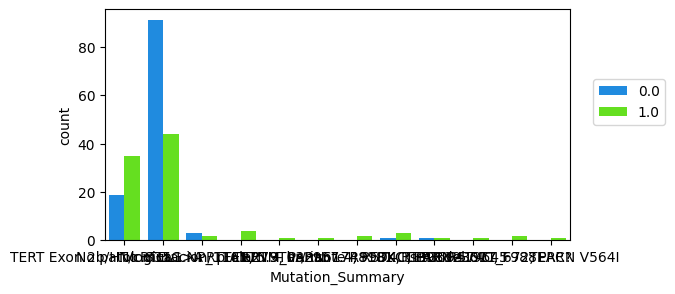

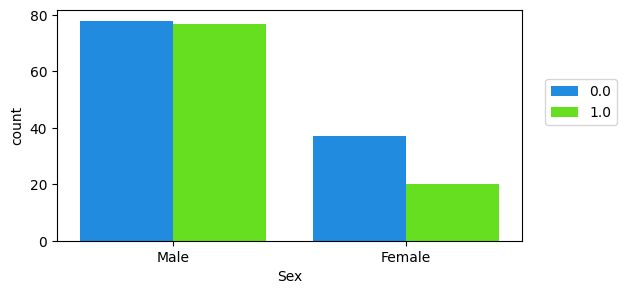

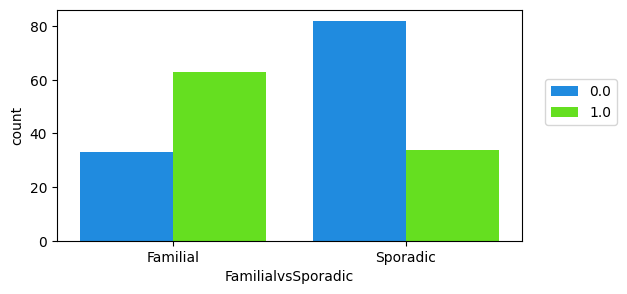

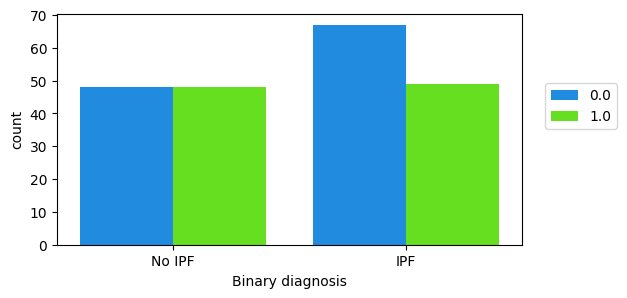

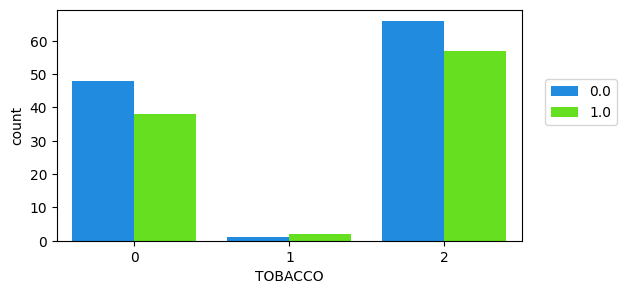

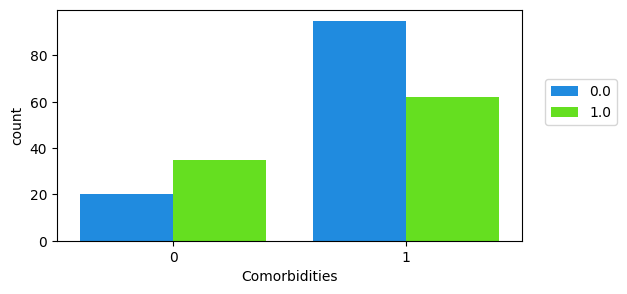

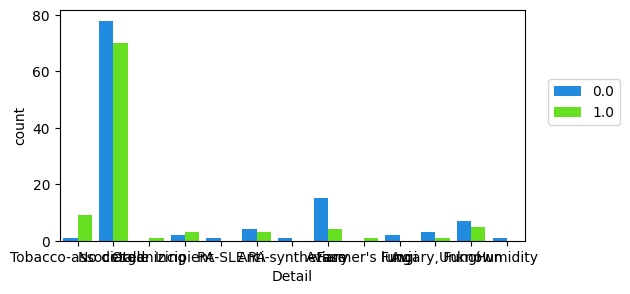

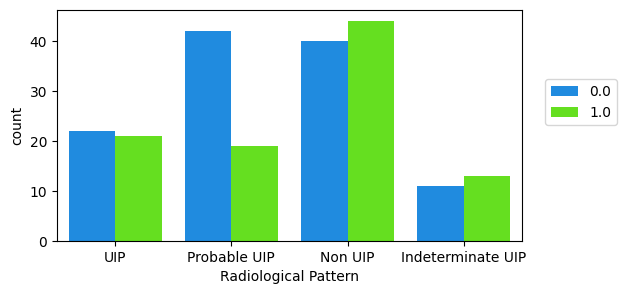

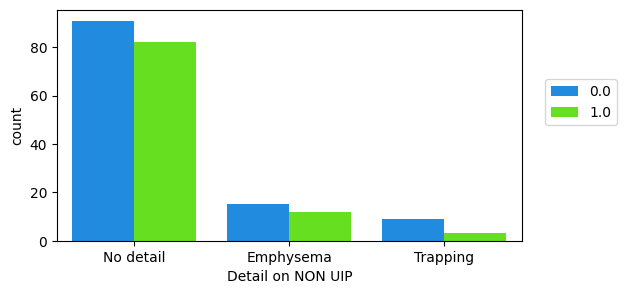

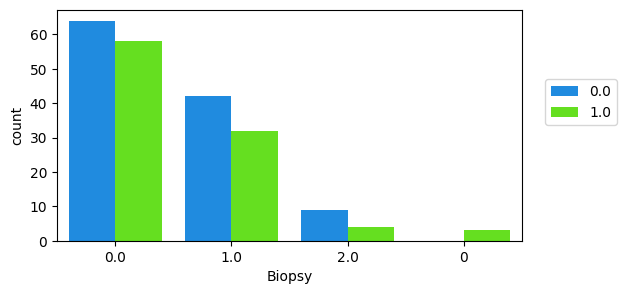

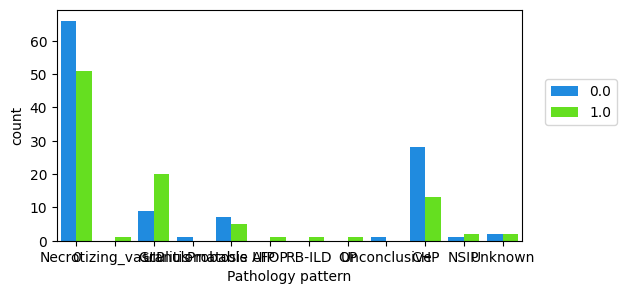

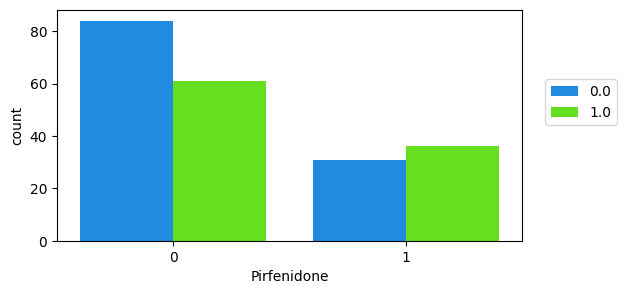

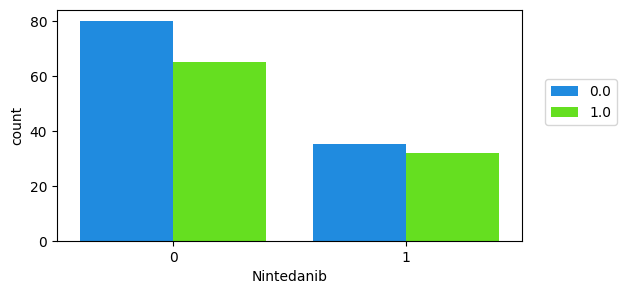

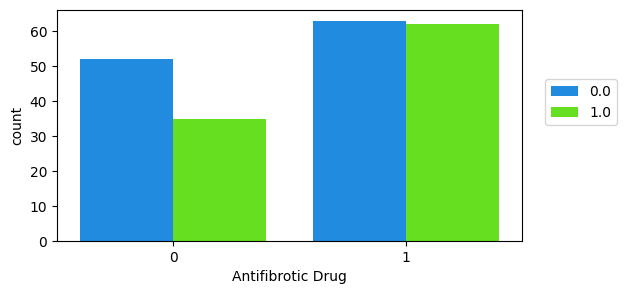

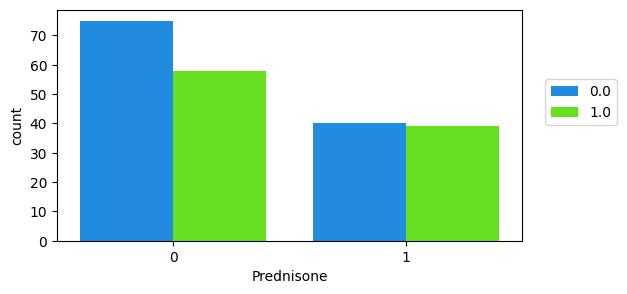

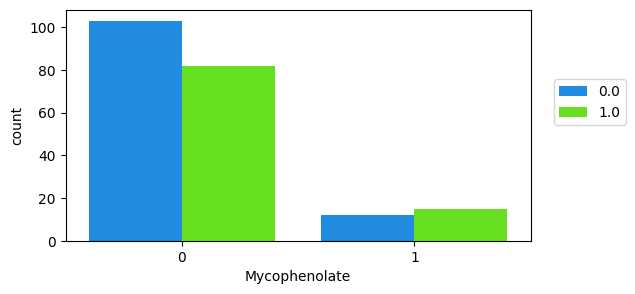

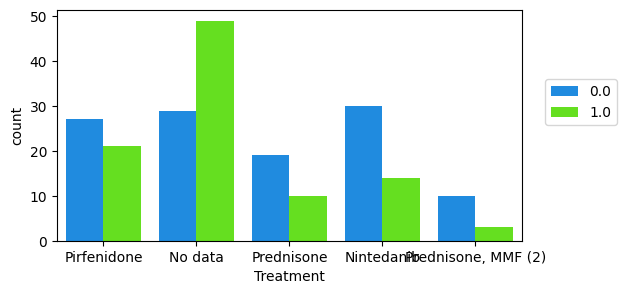

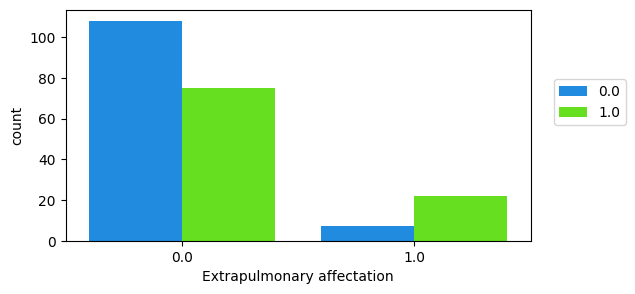

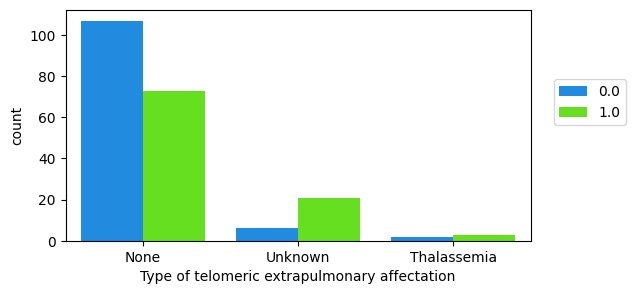

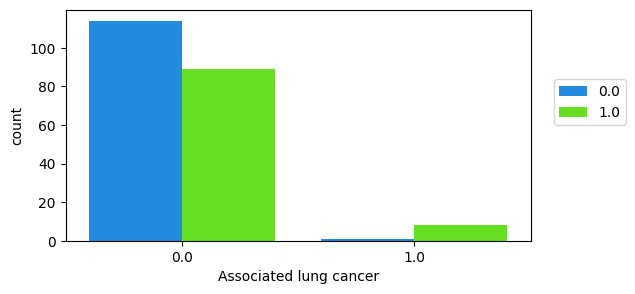

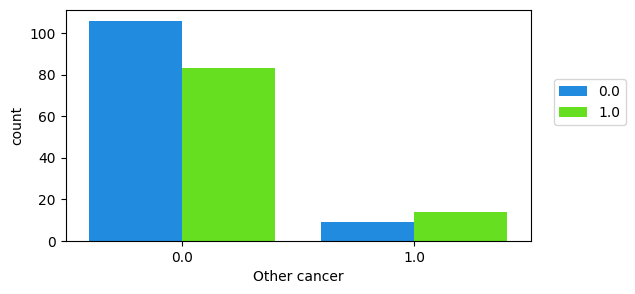

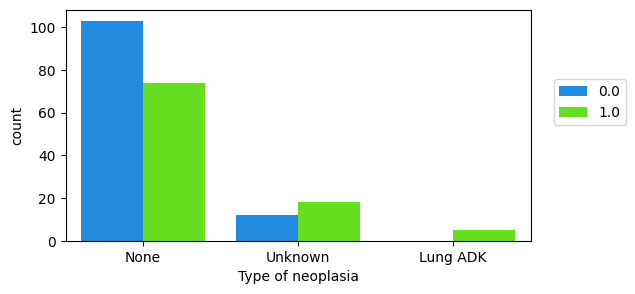

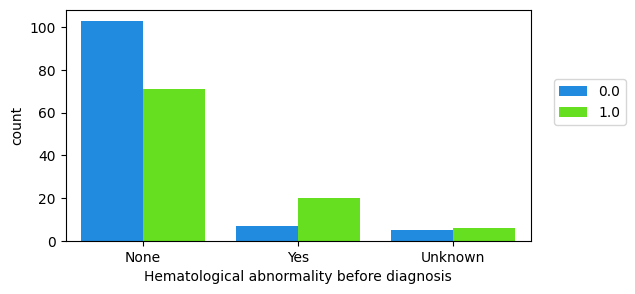

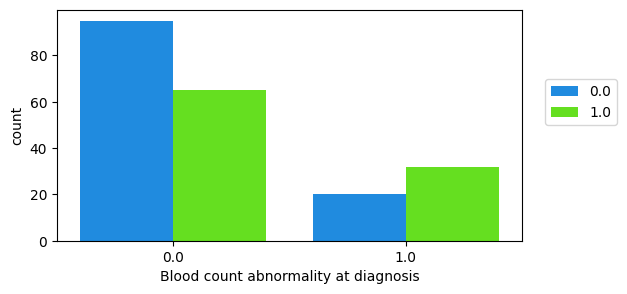

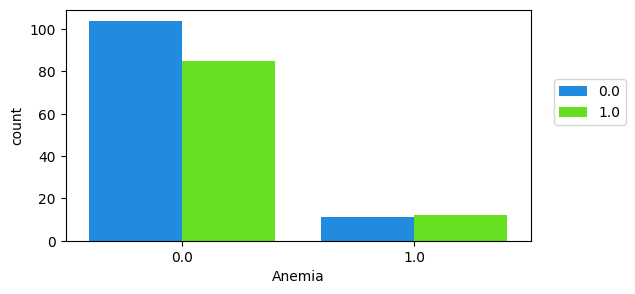

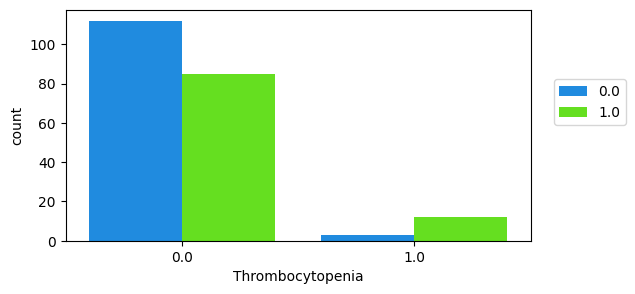

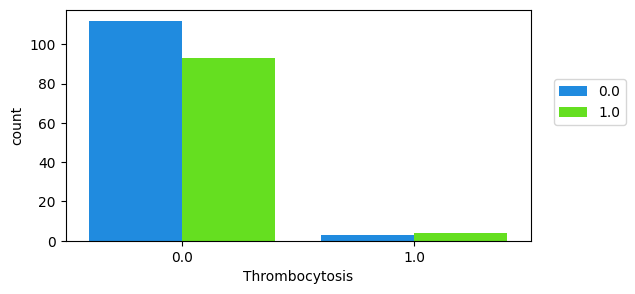

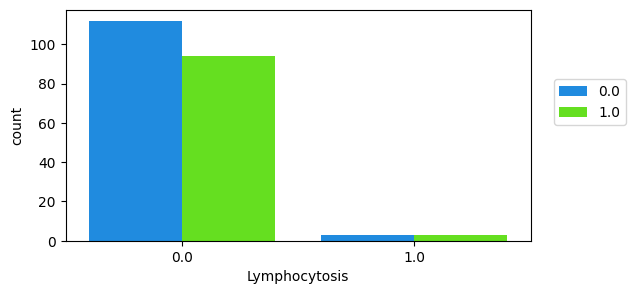

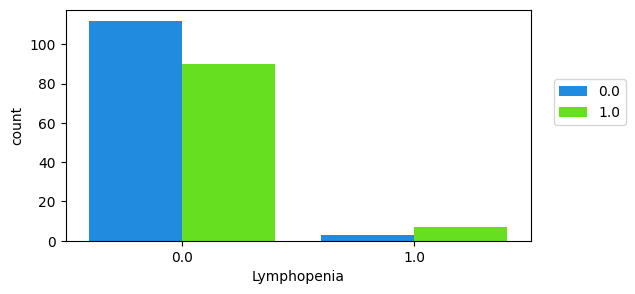

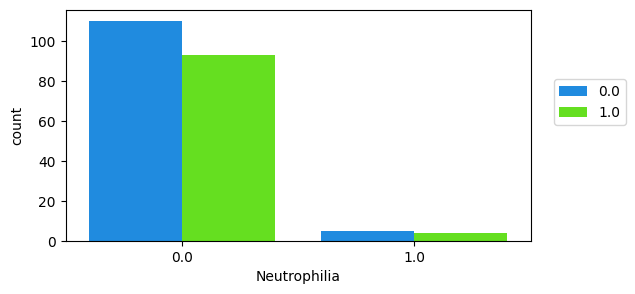

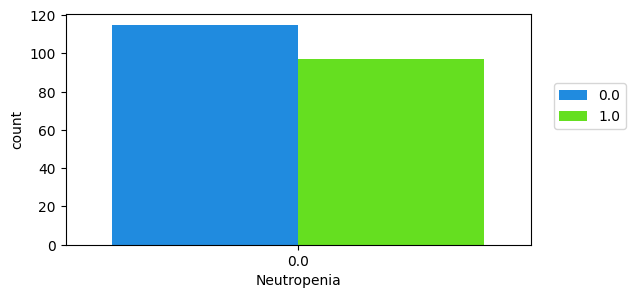

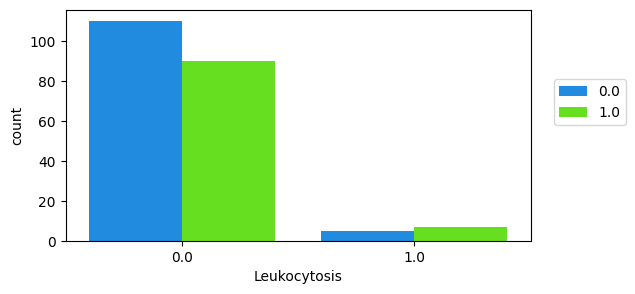

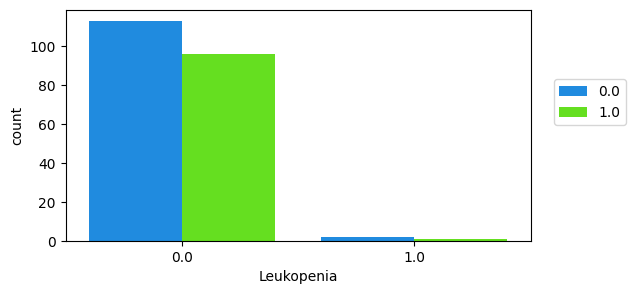

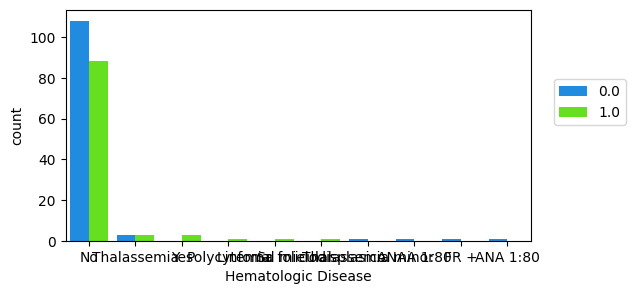

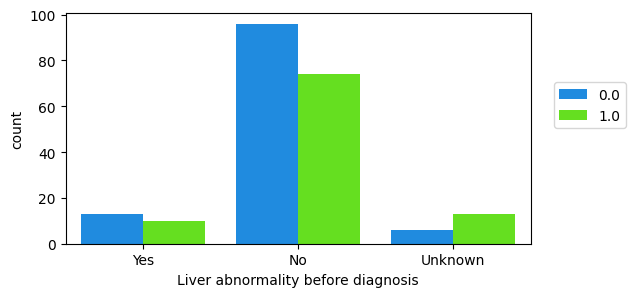

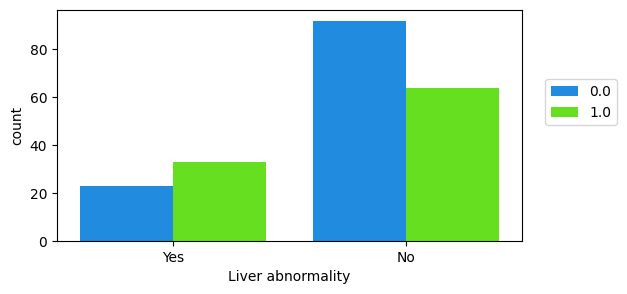

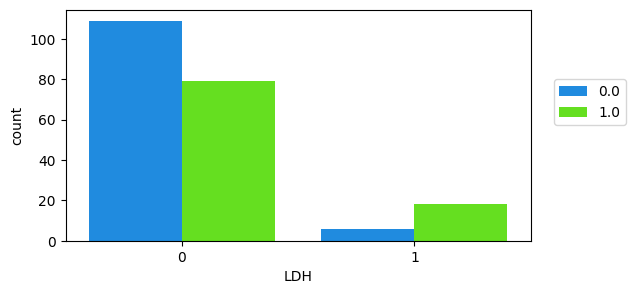

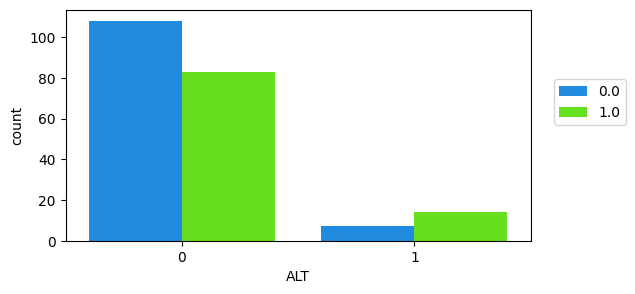

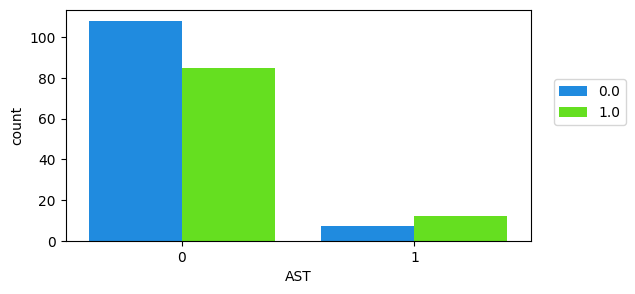

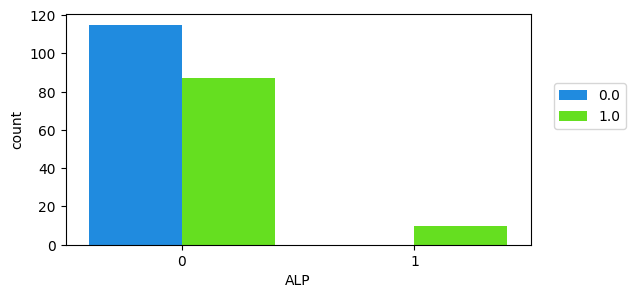

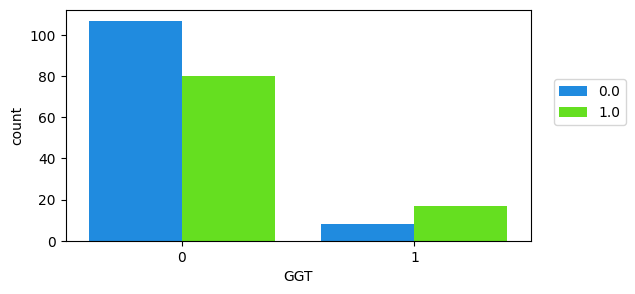

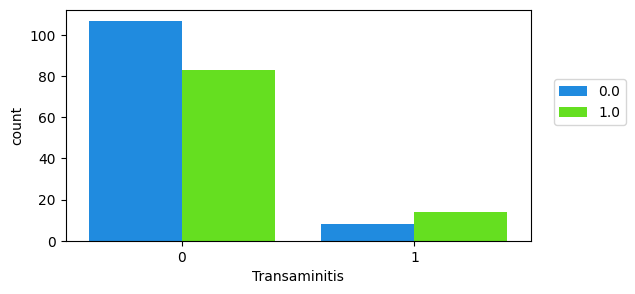

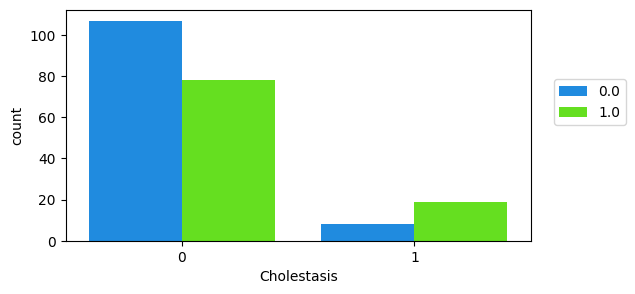

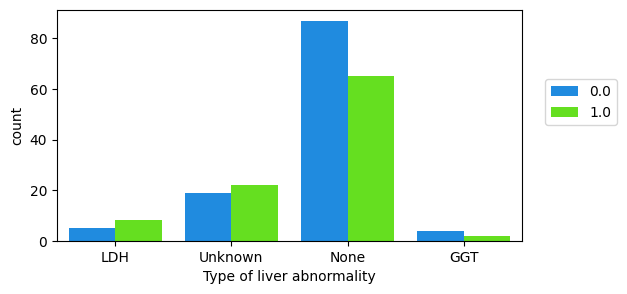

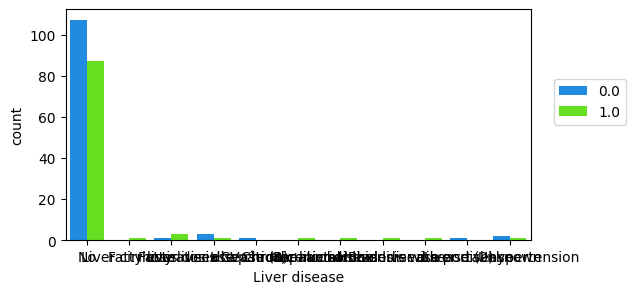

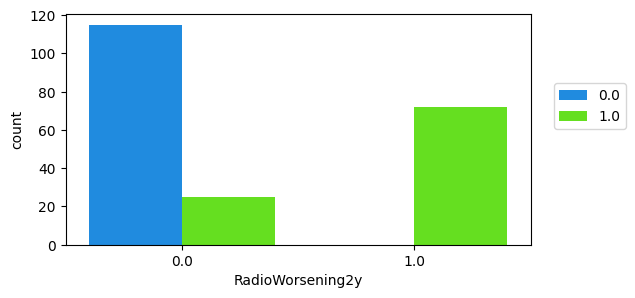

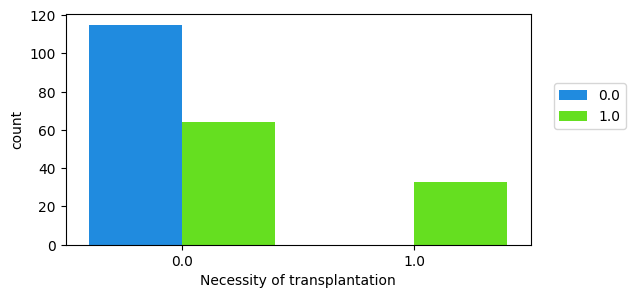

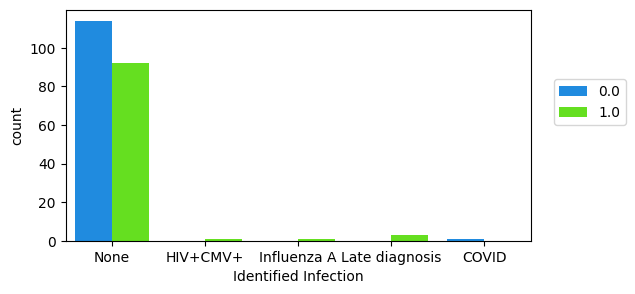

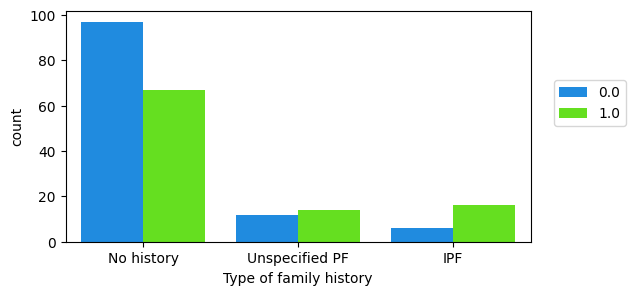

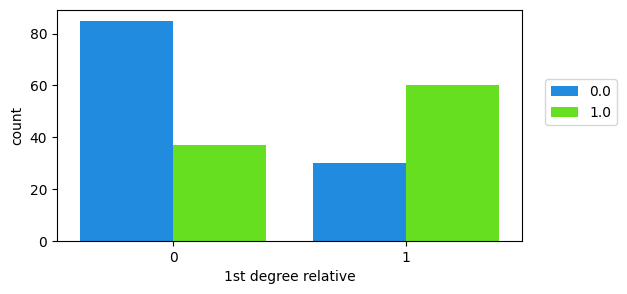

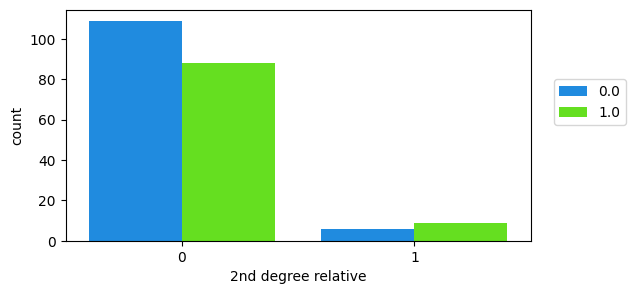

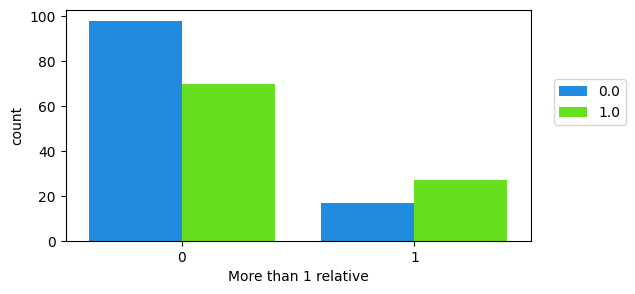

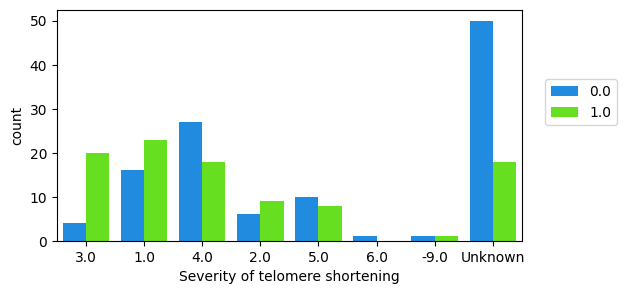

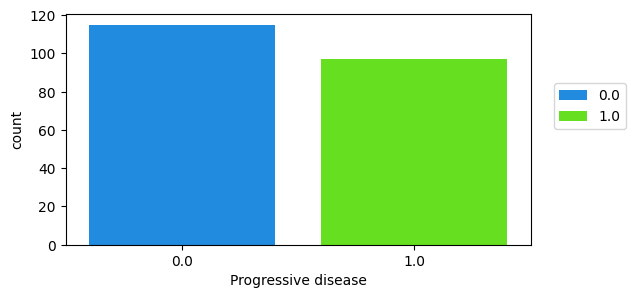

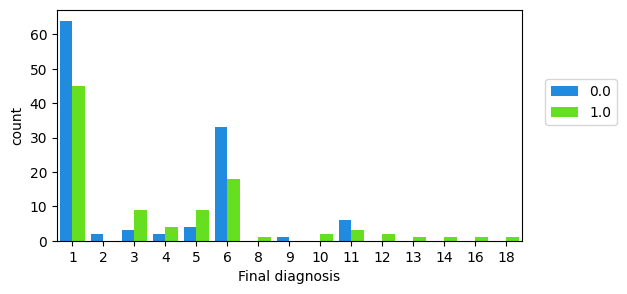

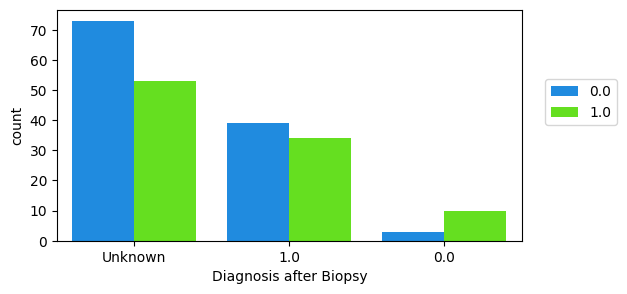

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
#no la detecta 'Pirfenidone' 'Nintedanib'
cat = [
    'Mutation_Summary','Sex', 'FamilialvsSporadic', 'Binary diagnosis', 'TOBACCO', 'Comorbidities',
    'Detail', 'Radiological Pattern', 'Detail on NON UIP', 'Biopsy',
    'Pathology pattern', 'Pirfenidone', 'Nintedanib',
    'Antifibrotic Drug', 'Prednisone', 'Mycophenolate', 'Treatment', 'Extrapulmonary affectation', 'Type of telomeric extrapulmonary affectation',
    'Associated lung cancer', 'Other cancer', 'Type of neoplasia', 'Hematological abnormality before diagnosis', 'Blood count abnormality at diagnosis',
    'Anemia', 'Thrombocytopenia', 'Thrombocytosis', 'Lymphocytosis', 'Lymphopenia', 'Neutrophilia', 'Neutropenia', 'Leukocytosis',
     'Leukopenia', 'Hematologic Disease','Liver abnormality before diagnosis', 'Liver abnormality', 'LDH', 'ALT', 'AST', 'ALP', 'GGT', 'Transaminitis',
     'Cholestasis', 'Type of liver abnormality', 'Liver disease', 'RadioWorsening2y', 'Necessity of transplantation', 'Identified Infection',
     'Type of family history', '1st degree relative', '2nd degree relative', 'More than 1 relative',
     'Severity of telomere shortening', 'Progressive disease',"Final diagnosis","Diagnosis after Biopsy"
]

for col in cat:
    plt.figure(figsize=(6,3), dpi=100)
    sns.countplot(data=df_cleaned,x=col,hue ='Progressive disease',palette='gist_rainbow_r')
    plt.legend(loc=(1.05,0.5))




# MIRAMOS LA RELACION ENTRE LAS VARIABLES NUMERICAS Y LA OBJETIVO

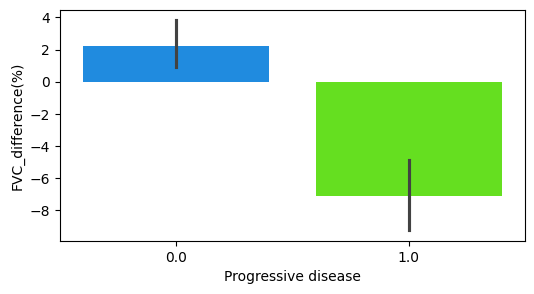

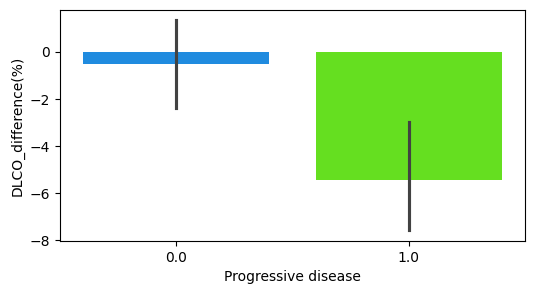

In [50]:

# Obtener todas las columnas del DataFrame
todas_las_columnas = df_cleaned.columns.tolist()
#  Restar las columnas categóricas de la lista total de columnas
num = [col for col in todas_las_columnas if col not in cat]

# Excluir 'Progressive disease' de las variables numéricas si es necesario
if 'Progressive disease' in num:
    num.remove('Progressive disease')

for col in num:
    plt.figure(figsize=(6,3), dpi=100)
    sns.barplot(data=df_cleaned, x='Progressive disease', y=col, hue='Progressive disease', palette='gist_rainbow_r', legend=False)
    plt.show()

# ANALIZAMOS DISTRIBUCION DE LAS VARIABLES NUMERICAS (HISTOGRAMA)

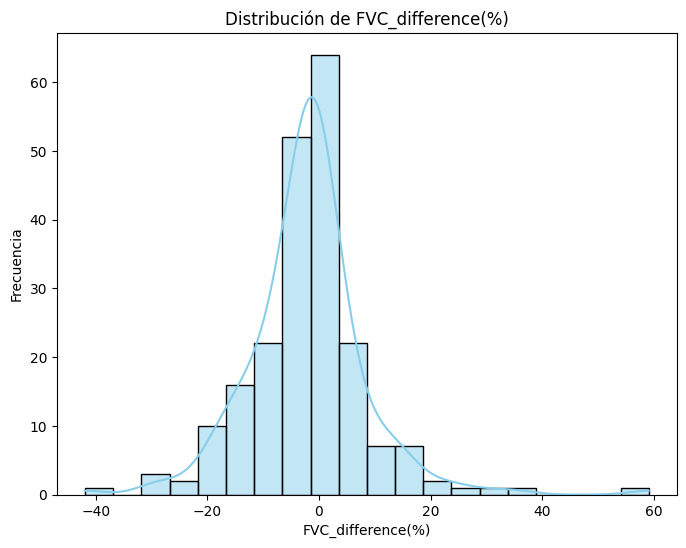


Análisis estadístico de FVC_difference(%):
count    212.000000
mean      -2.052895
std       10.540967
min      -41.900000
25%       -7.000000
50%       -1.550000
75%        1.450000
max       59.100000
Name: FVC_difference(%), dtype: float64



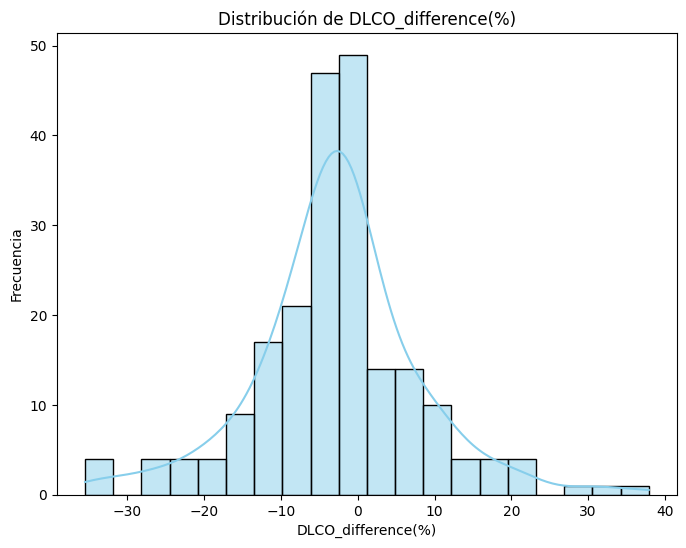


Análisis estadístico de DLCO_difference(%):
count    212.000000
mean      -2.786799
std       10.816472
min      -35.500000
25%       -8.000000
50%       -3.000000
75%        1.325000
max       37.889630
Name: DLCO_difference(%), dtype: float64

Comentarios y discusión sobre los resultados:
- Se observa la distribución de cada variable mediante gráficos de histogramas.
- Las estadísticas descriptivas proporcionan información sobre la tendencia central, dispersión y forma de la distribución.
- Se deben tener en cuenta posibles valores atípicos que puedan afectar estas estadísticas.


In [51]:

# Realizar análisis estadístico e visualización para cada variable
for variable in num:
    # Estadísticas descriptivas
    estadisticas_descriptivas = df_cleaned[variable].describe()

    # Visualización de la distribución
    plt.figure(figsize=(8, 6))
    sns.histplot(df_cleaned[variable], kde=True, bins=20, color='skyblue')
    plt.title(f'Distribución de {variable}')
    plt.xlabel(variable)
    plt.ylabel('Frecuencia')
    plt.show()

    # Imprimir estadísticas descriptivas
    print(f"\nAnálisis estadístico de {variable}:\n{estadisticas_descriptivas}\n")

# Comentarios y discusión sobre los resultados
print("Comentarios y discusión sobre los resultados:")
print("- Se observa la distribución de cada variable mediante gráficos de histogramas.")
print("- Las estadísticas descriptivas proporcionan información sobre la tendencia central, dispersión y forma de la distribución.")
print("- Se deben tener en cuenta posibles valores atípicos que puedan afectar estas estadísticas.")

In [52]:
# Instalación de bibliotecas
%pip install pycaret
%pip install dataprep
%pip install ucimlrepo
%pip install imbalanced-learn


# Importación de bibliotecas y módulos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# Importación de modelos de clasificación y procesamiento de datos
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, f1_score, confusion_matrix
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

  Using cached ucimlrepo-0.0.7-py3-none-any.whl.metadata (5.5 kB)
Using cached ucimlrepo-0.0.7-py3-none-any.whl (8.0 kB)


# HACEMOS UNA COPIA DE LA BASE DE DATOS, PARA EDITARLA

In [53]:
# Escribir el DataFrame preprocesado a un nuevo archivo CSV
df_cleaned.to_excel("/content/FibroPredCODIFICADA_preprocesada.xlsx",  index=False)

# Cargar el DataFrame preprocesado desde el archivo CSV
df_copia = pd.read_excel("/content/FibroPredCODIFICADA_preprocesada.xlsx")

# ESTUDIO BALANCEO DE LA VARIABLE OBJETIVO

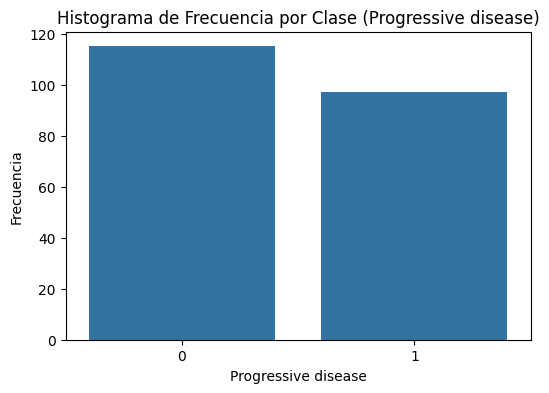

Estudio de Balance de Clases:
Frecuencia por clase:
0    115
1     97
Name: Progressive disease, dtype: int64
Clases balanceadas: False


In [54]:
#ESTUDIO DEL BALANCEAMEAMIENTO DE CLASES

# Identificar la variable objetivo
variable_objetivo = 'Progressive disease'

# Visualizar el histograma de frecuencia por clase
plt.figure(figsize=(6, 4))
sns.countplot(x=df_copia[variable_objetivo])
plt.title(f'Histograma de Frecuencia por Clase ({variable_objetivo})')
plt.xlabel(variable_objetivo)
plt.ylabel('Frecuencia')
plt.show()

# Estudio de balance de clases
frecuencia_clases = df_copia[variable_objetivo].value_counts()
clases_balanceadas = frecuencia_clases.min() == frecuencia_clases.max()

# Imprimir resultados del estudio de balance de clases
print("Estudio de Balance de Clases:")
print(f"Frecuencia por clase:\n{frecuencia_clases}")
print(f"Clases balanceadas: {clases_balanceadas}")


ya estan balanceadas

# IDENTIFICACIÓN DE OUTLIERS

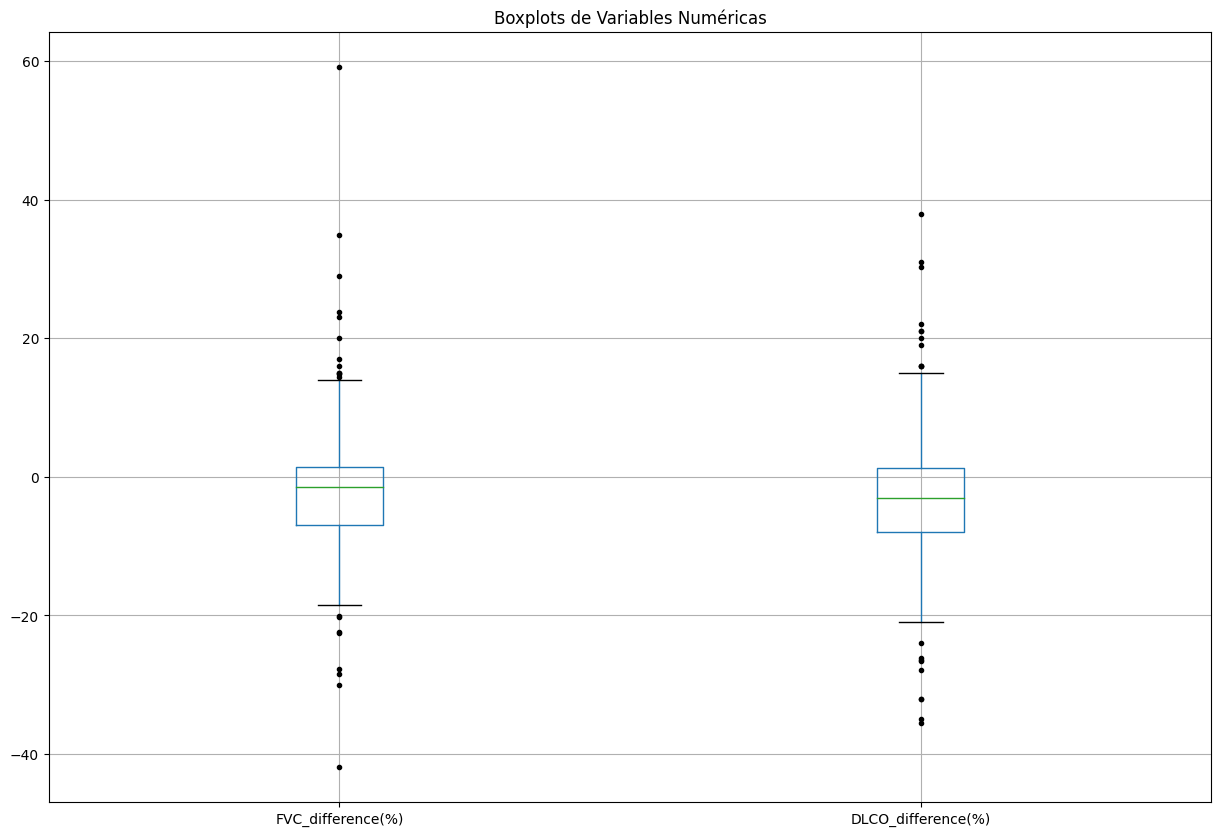

Comentarios sobre los boxplots:
- Se visualizan los boxplots para cada variable numérica, ayudando a identificar posibles outliers.
- Los puntos fuera de los 'bigotes' de los boxplots pueden indicar valores atípicos.


In [55]:
# Visualizar boxplots juntos con sus outliers
plt.figure(figsize=(15, 10))
df_copia[num].boxplot(sym='k.')
plt.title('Boxplots de Variables Numéricas')
plt.show()

# Comentarios sobre los boxplots
print("Comentarios sobre los boxplots:")
print("- Se visualizan los boxplots para cada variable numérica, ayudando a identificar posibles outliers.")
print("- Los puntos fuera de los 'bigotes' de los boxplots pueden indicar valores atípicos.")

<Figure size 1000x500 with 0 Axes>

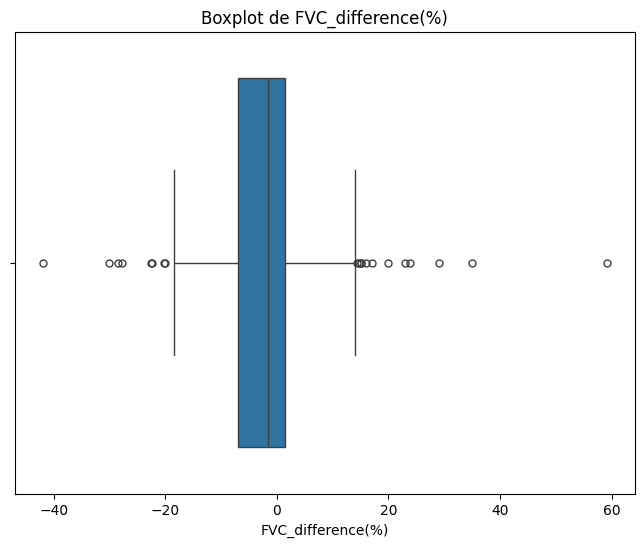

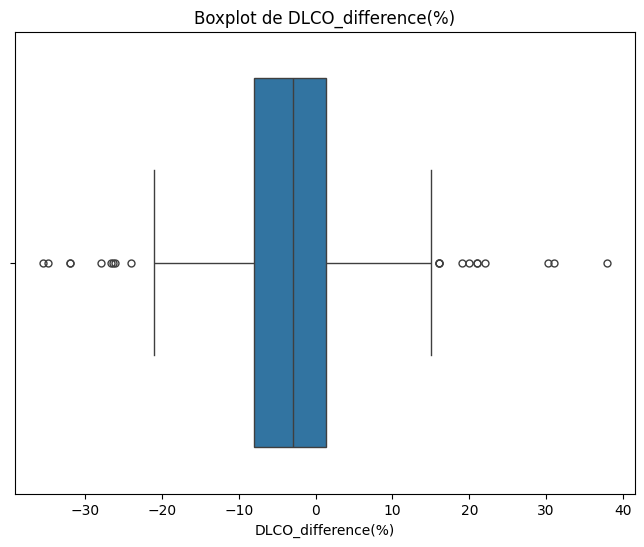

In [56]:
# Visualizar boxplots para cada variable con sus outliers
plt.figure(figsize=(10, 5))
for columna in num:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df_copia[columna], fliersize=5)
    plt.title(f'Boxplot de {columna}')
    plt.show()

# MATRIZ DE CORRELACIÓN ENTRE LAS VARIABLES NUMERICAS

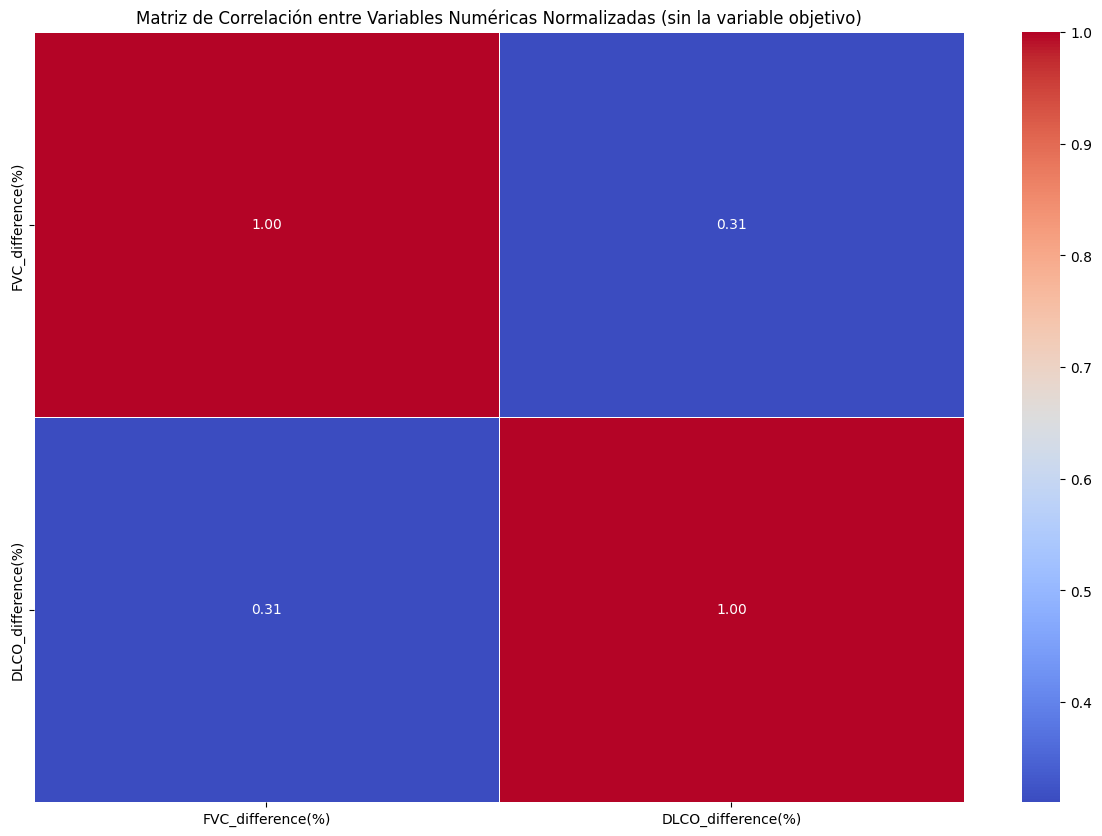

In [57]:
# Extrae las columnas del DataFrame 'df' que están en la lista 'num'
df_num = df_copia[num]

# Calcula la matriz de correlación
correlation_matrix_normalized = df_num.corr()

# Visualización de la matriz de correlación
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix_normalized, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Matriz de Correlación entre Variables Numéricas Normalizadas (sin la variable objetivo)')
plt.show()

# NORMALIZAMOS LAS VARIABLES NUMÉRICAS

In [58]:
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import boxcox

# Extraer las variables numéricas
data_numericas = df_copia[num]

# Normalizar los datos utilizando MinMaxScaler
scaler_minmax = MinMaxScaler()
data_minmax = pd.DataFrame(scaler_minmax.fit_transform(data_numericas), columns=num, index=data_numericas.index)

# Concatenar las columnas transformadas con las columnas categóricas
df_preprocesado_norm = pd.concat([data_minmax, df_copia.drop(num, axis=1)], axis=1)

# Imprimir las primeras filas del DataFrame resultante
print("\nDataFrame después de la normalización:")
print(df_preprocesado_norm.head())


DataFrame después de la normalización:
   FVC_difference(%)  DLCO_difference(%)     Sex FamilialvsSporadic  \
0           0.287129            0.260255    Male           Familial   
1           0.193069            0.550486    Male           Familial   
2           0.460396            0.426491    Male           Familial   
3           0.000000            0.198938  Female           Familial   
4           0.451485            0.342010    Male           Familial   

  Binary diagnosis  Final diagnosis  TOBACCO              Detail  \
0           No IPF                3        2  Tobacco-associated   
1           No IPF                8        2          No detalle   
2           No IPF                3        2  Tobacco-associated   
3              IPF                1        0          Organizing   
4              IPF                1        0          No detalle   

   Comorbidities Radiological Pattern  ... RadioWorsening2y  \
0              0                  UIP  ...                1  

#### VERIFICAMOS QUE NO SE HAN GENERADO MAS MISSINGS DESPUÉS DE NORMALIZAR

In [59]:
import numpy as np

# Reemplazar 'n/a' por NaN en todo el DataFrame
df_preprocesado_norm.replace('n/a', np.nan, inplace=True)

# Reemplazar otros valores que podrían indicar "nulo" o "vacío"
df_preprocesado_norm.replace(['null', 'NA', 'na'], np.nan, inplace=True)

# Mostrar los missings para las columnas de la 5 a la 60
missing_values = df_preprocesado_norm.iloc[:, 20:65].isnull().sum()
print(missing_values)



Extrapulmonary affectation                      0
Type of telomeric extrapulmonary affectation    0
Associated lung cancer                          0
Other cancer                                    0
Type of neoplasia                               0
Hematological abnormality before diagnosis      0
Blood count abnormality at diagnosis            0
Anemia                                          0
Thrombocytopenia                                0
Thrombocytosis                                  0
Lymphocytosis                                   0
Lymphopenia                                     0
Neutrophilia                                    0
Neutropenia                                     0
Leukocytosis                                    0
Leukopenia                                      0
Hematologic Disease                             0
Liver abnormality before diagnosis              0
Liver abnormality                               0
LDH                                             0


### VERIFICAMOS QUE SE HA ESCALADO CORRECTAMENTE

In [60]:
# Antes del escalado
print("Min antes del escalado:")
print(df_preprocesado[num].min())

print("\Max antes del escalado:")
print(df_preprocesado[num].max())

Min antes del escalado:
FVC_difference(%)    -41.9
DLCO_difference(%)   -35.5
dtype: float64
\Max antes del escalado:
FVC_difference(%)     59.10000
DLCO_difference(%)    37.88963
dtype: float64


In [61]:
# Después del escalado
print("Min después del escalado:")
print(df_preprocesado_norm[num].min())

print("\Max después del escalado:")
print(df_preprocesado_norm[num].max())

Min después del escalado:
FVC_difference(%)     0.0
DLCO_difference(%)    0.0
dtype: float64
\Max después del escalado:
FVC_difference(%)     1.0
DLCO_difference(%)    1.0
dtype: float64


In [62]:
df_preprocesado_norm.shape

(212, 58)

# CONVERTIMOS LAS VARIABLE CATEGORICAS EN BINARIAS (OneHotEncoder)

In [63]:
print(cat)
cat.remove('Progressive disease')
print(cat)

['Mutation_Summary', 'Sex', 'FamilialvsSporadic', 'Binary diagnosis', 'TOBACCO', 'Comorbidities', 'Detail', 'Radiological Pattern', 'Detail on NON UIP', 'Biopsy', 'Pathology pattern', 'Pirfenidone', 'Nintedanib', 'Antifibrotic Drug', 'Prednisone', 'Mycophenolate', 'Treatment', 'Extrapulmonary affectation', 'Type of telomeric extrapulmonary affectation', 'Associated lung cancer', 'Other cancer', 'Type of neoplasia', 'Hematological abnormality before diagnosis', 'Blood count abnormality at diagnosis', 'Anemia', 'Thrombocytopenia', 'Thrombocytosis', 'Lymphocytosis', 'Lymphopenia', 'Neutrophilia', 'Neutropenia', 'Leukocytosis', 'Leukopenia', 'Hematologic Disease', 'Liver abnormality before diagnosis', 'Liver abnormality', 'LDH', 'ALT', 'AST', 'ALP', 'GGT', 'Transaminitis', 'Cholestasis', 'Type of liver abnormality', 'Liver disease', 'RadioWorsening2y', 'Necessity of transplantation', 'Identified Infection', 'Type of family history', '1st degree relative', '2nd degree relative', 'More than 

In [64]:
# Lista de las columnas categóricas (excluyendo 'Progressive disease')

# Aplicar One-Hot Encoding a las columnas categóricas del DataFrame
data_encoded = pd.get_dummies(df_preprocesado_norm, columns=cat, drop_first=True)

# Imprimir las primeras filas del DataFrame resultante del entrenamiento y la prueba
print(data_encoded.head())
print(data_encoded.head())

   FVC_difference(%)  DLCO_difference(%)  Progressive disease  \
0           0.287129            0.260255                    1   
1           0.193069            0.550486                    1   
2           0.460396            0.426491                    1   
3           0.000000            0.198938                    1   
4           0.451485            0.342010                    1   

   Mutation_Summary_No mutacion  Mutation_Summary_No patologica  \
0                             0                               1   
1                             0                               1   
2                             0                               1   
3                             1                               0   
4                             0                               0   

   Mutation_Summary_PARN  \
0                      0   
1                      0   
2                      0   
3                      0   
4                      0   

   Mutation_Summary_RTEL1 NP_116575.3

# DIVIDIMOS LA BASE DE DATOS EN TRAIN_DATA Y TEST_DATA

In [65]:
from sklearn.model_selection import train_test_split

# Particionado del conjunto de datos
train_data_encoded, test_data_encoded = train_test_split(data_encoded, test_size=0.20, random_state=42)

print(train_data_encoded.shape)
print(test_data_encoded.shape)

# Continúamos con el análisis utilizando train_data y test_data
#en este caso como continuamos con el preprocesamiento trabajaremos sobre train_data

(169, 143)
(43, 143)


# MIRAMOS CUANTAS CLASES HAY EN CADA VARIABLE

In [66]:
unique_counts = pd.DataFrame.from_records([(col, data_encoded[col].nunique()) for col in train_data_encoded.columns],
                                         columns=['col_name', 'unique']).sort_values(by=['unique'])
unique_counts
#crea un nuevo dataframe con los nombres de las columnas y con el nº de valores que puede tener (sex: hombre, mujer)

,col_name,unique
71,Thrombocytosis_1,2
91,AST_1,2
92,ALP_1,2
93,GGT_1,2
94,Transaminitis_1,2
...,...,...
49,Pathology pattern_Unknown,2
50,Pirfenidone_1,2
44,Pathology pattern_OP,2
0,FVC_difference(%),99


In [67]:
train_data_encoded.columns

Index(['FVC_difference(%)', 'DLCO_difference(%)', 'Progressive disease',
       'Mutation_Summary_No mutacion', 'Mutation_Summary_No patologica',
       'Mutation_Summary_PARN',
       'Mutation_Summary_RTEL1 NP_116575.3, variante R998X, rs398123017',
       'Mutation_Summary_RTEL1 R574C, F988L',
       'Mutation_Summary_RTEL1, NM_032957.4, R574C, rs369419645',
       'Mutation_Summary_TERC?',
       ...
       'Final diagnosis_9', 'Final diagnosis_10', 'Final diagnosis_11',
       'Final diagnosis_12', 'Final diagnosis_13', 'Final diagnosis_14',
       'Final diagnosis_16', 'Final diagnosis_18', 'Diagnosis after Biopsy_1',
       'Diagnosis after Biopsy_Unknown'],
      dtype='object', length=143)

In [68]:
train_data_encoded.to_excel("one_hot_encoding.xlsx")

# PREPARACIÓN DE VARIABLES

### ANALIZAMOS LOS GRAFICOS DE TODAS LAS VARIABLES DESPUÉS DE APLICAR EL ONE-HOT ENCODING Y LA NORMALIZAIÓN

In [69]:
for columna in train_data_encoded.columns:
    # Estadísticas descriptivas
    estadisticas_descript = train_data_encoded[columna].describe()

    #sns.histplot(train_data_balanced_encoded[columna], kde=True, bins=20, color='skyblue')
    #plt.title(f'Distribución de {columna} Después de Escalar')
    #plt.xlabel('rango')
    #plt.ylabel('Frecuencia')
    #plt.show()

    # Imprimir estadísticas descriptivas
    #print(f"\nAnálisis estadístico de {columna}:\n{estadisticas_descript}\n")

### ANALISIS DE LA CORRELACIÓN ENTRE LAS VARIABLES CATEGORICAS Y LA OBJETIVO

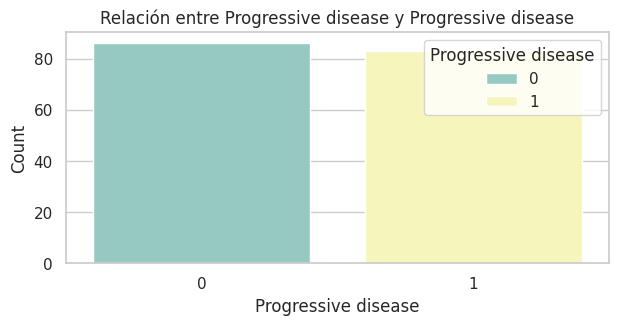

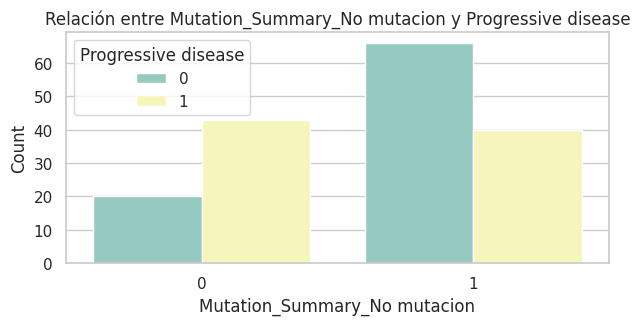

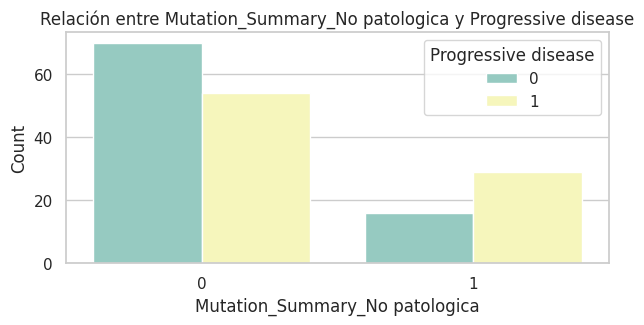

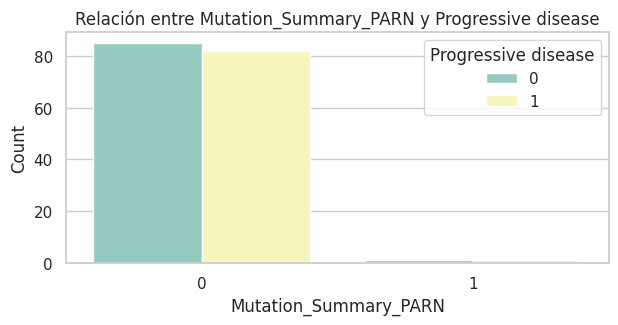

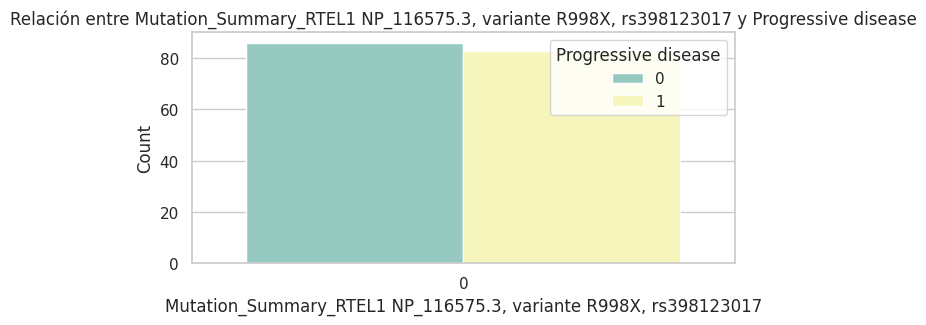

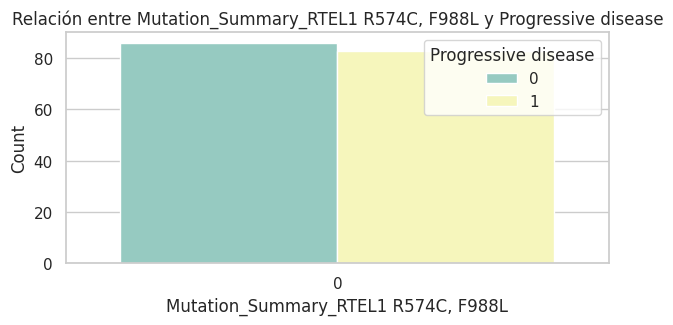

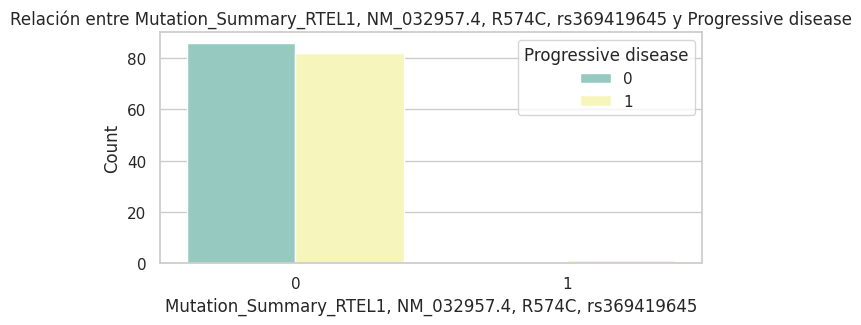

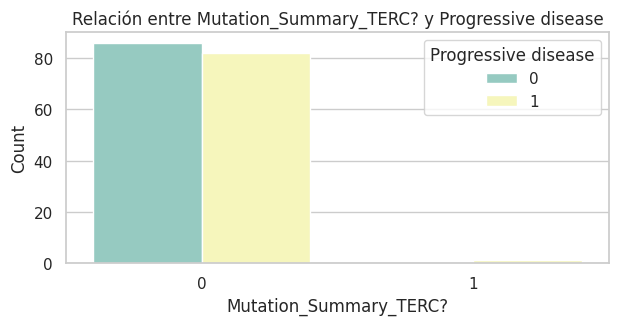

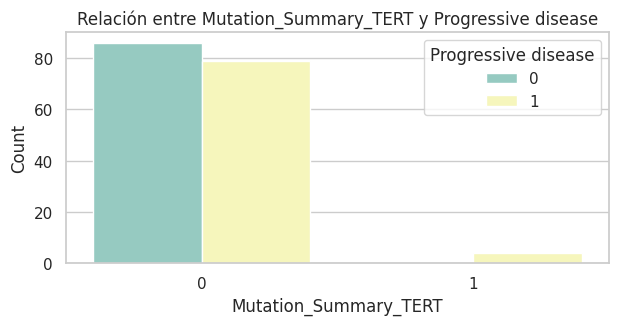

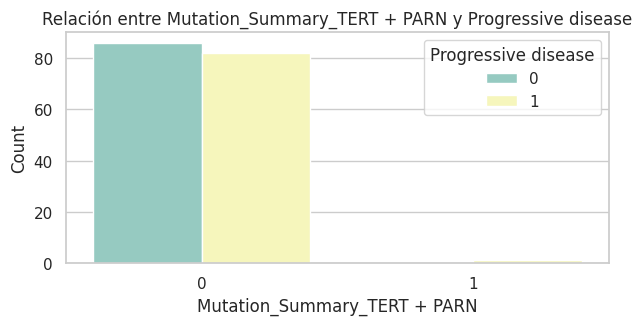

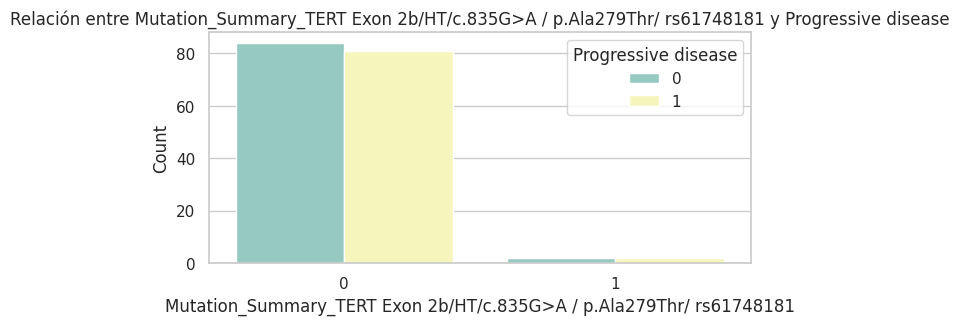

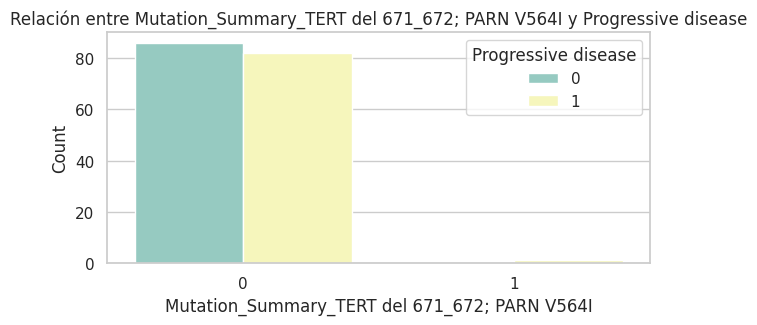

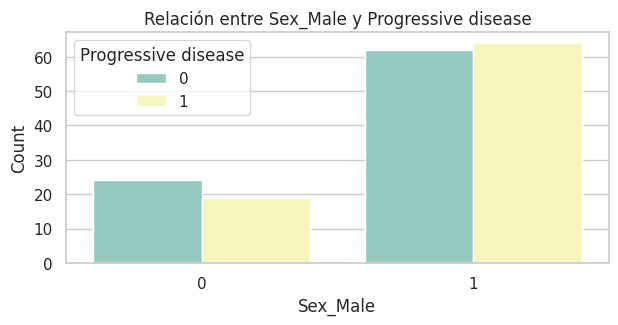

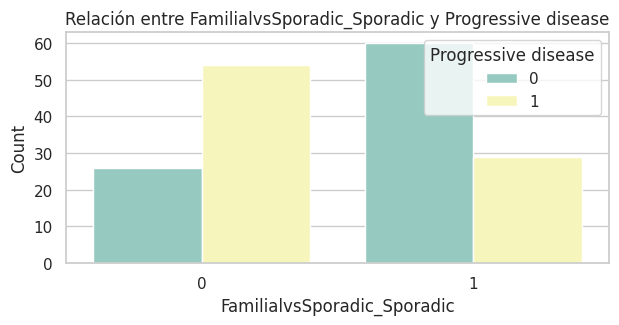

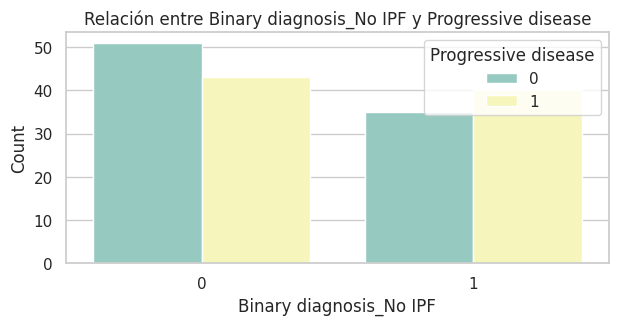

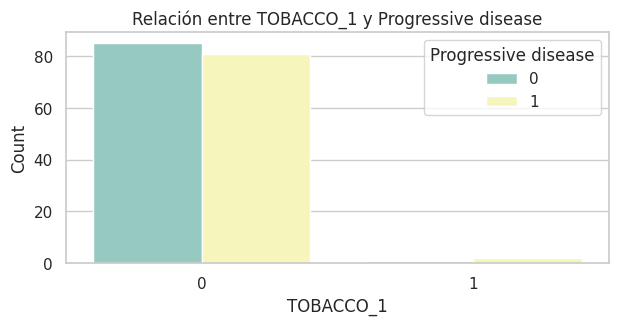

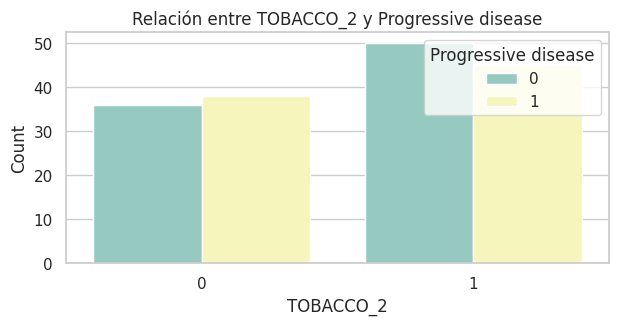

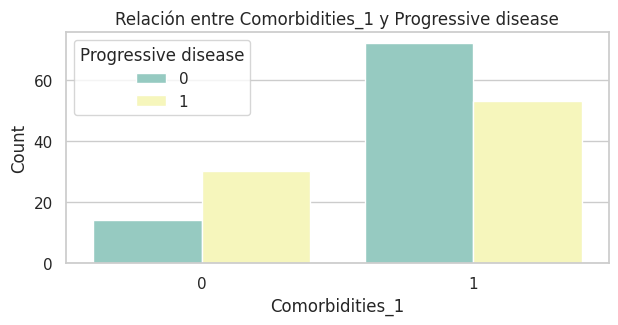

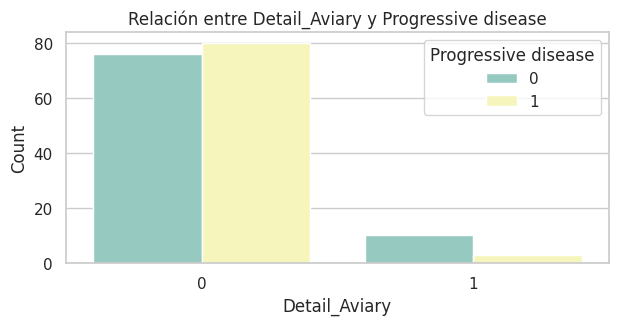

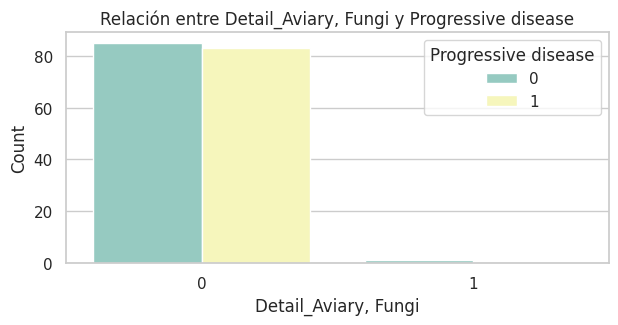

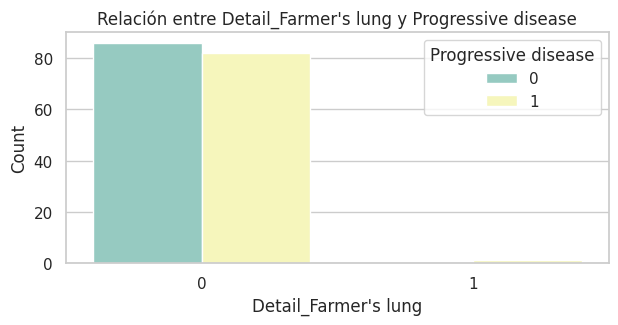

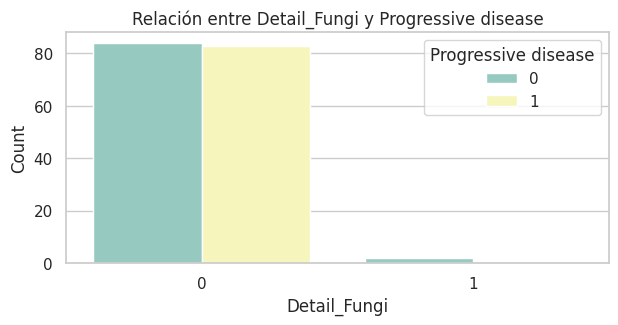

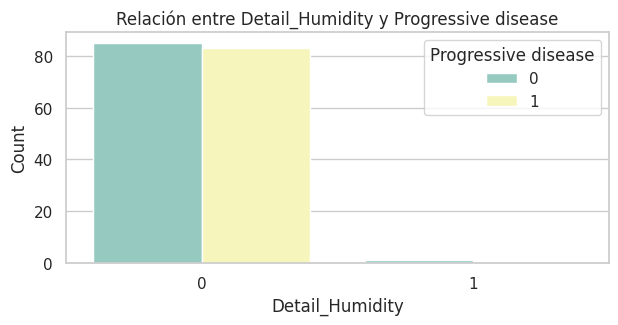

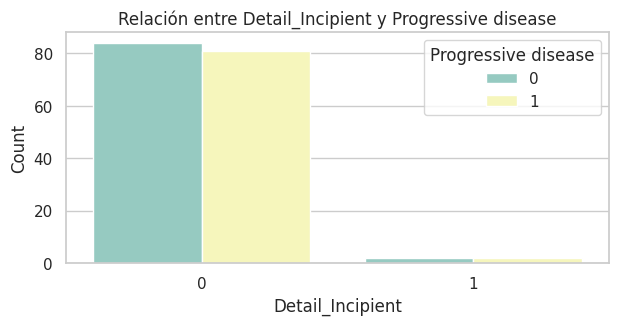

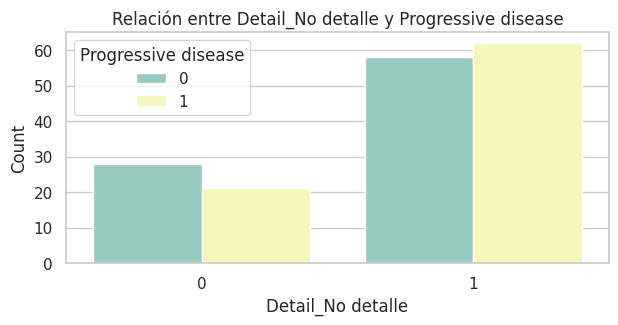

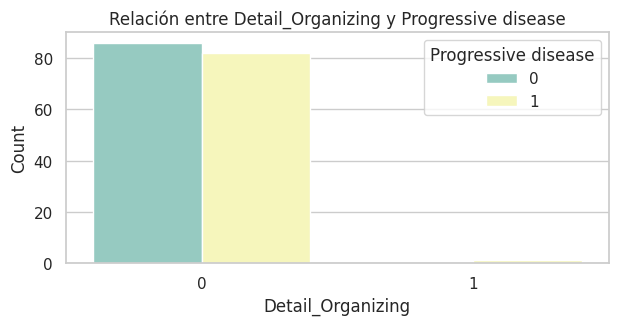

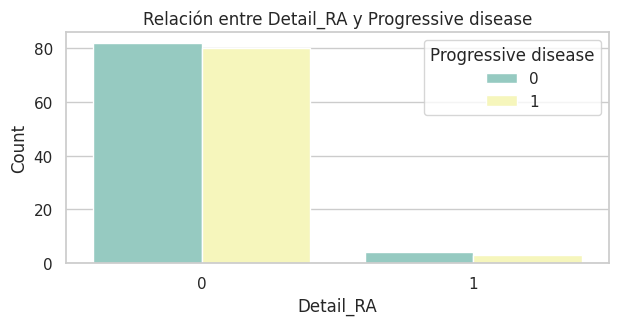

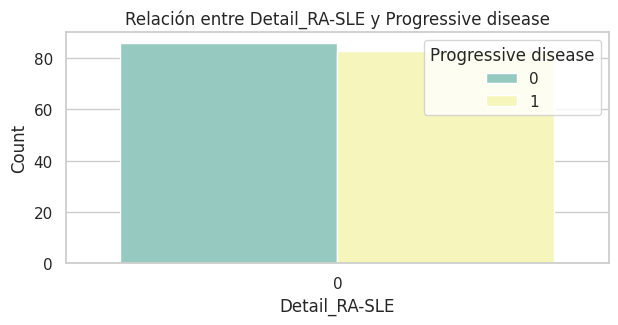

In [ ]:
target_variable = 'Progressive disease'

# Configuración de estilo de seaborn
sns.set(style="whitegrid")

col_num = [ "FVC_difference(%)", "DLCO_difference(%)"]
col_cat = [col for col in train_data_encoded.columns if col not in col_num]

# Análisis de variables categóricas y variable objetivo
for cat_var in col_cat:
    # Gráfico de barras apiladas para visualizar la relación con la variable objetivo
    plt.figure(figsize=(7, 3))
    sns.countplot(x=cat_var, hue=target_variable, data=train_data_encoded, palette="Set3")
    plt.title(f'Relación entre {cat_var} y {target_variable}')
    plt.xlabel(cat_var)
    plt.ylabel('Count')
    plt.legend(title=target_variable)
    plt.show()

In [ ]:
#No influeix en el target
train_data_encoded.drop(columns=['Binary diagnosis_No IPF'], inplace=True)
test_data_encoded.drop(columns=['Binary diagnosis_No IPF'], inplace=True)


In [ ]:
# Usando .shape
print(f"El DataFrame tiene {train_data_encoded.shape[1]} columnas.")




In [ ]:
from sklearn.decomposition import PCA

# Crear una lista de columnas sin modificar el DataFrame original
variables_numericas = train_data_encoded.columns.difference(['Progressive disease'])
print(variables_numericas)

# Obtener solo los valores de esas columnas
datos_numericos = train_data_encoded[variables_numericas].values

# Aplicar PCA
pca = PCA()
pca_resultados = pca.fit_transform(datos_numericos)

print(f"PCA realizado con éxito sobre {len(variables_numericas)} variables.")

# Varianza explicada acumulativa
varianza_explicada_acumulativa = np.cumsum(pca.explained_variance_ratio_)

# Número de dimensiones y varianza explicada
num_dimensiones = range(1, len(varianza_explicada_acumulativa) + 1)

# Visualizar la varianza explicada acumulativa
plt.figure(figsize=(10, 6))
plt.plot(num_dimensiones, varianza_explicada_acumulativa, marker='o', linestyle='--', color='b')
plt.axhline(y=0.95, color='r', linestyle='--', label='Umbral del 95% de Varianza')
plt.title('Varianza Explicada Acumulativa con PCA')
plt.xlabel('Número de Dimensiones')
plt.ylabel('Varianza Explicada Acumulativa')
plt.legend()
plt.grid(True)
plt.show()

# Número óptimo de dimensiones que explican al menos el 95% de la varianza
umbral_varianza = 0.95
num_dimensiones_optimo = np.argmax(varianza_explicada_acumulativa >= umbral_varianza) + 1

print(f"\nNúmero óptimo de dimensiones que explican al menos el {umbral_varianza * 100}% de la varianza: {num_dimensiones_optimo}")

# Reducción de dimensiones con PCA utilizando el número óptimo de dimensiones
pca_optimo = PCA(n_components=num_dimensiones_optimo)
X_pca_optimo = pca_optimo.fit_transform(train_data_encoded[variables_numericas])

# Crear un nuevo DataFrame con las dimensiones reducidas y la variable objetivo
df_train_pca = pd.DataFrame(data=X_pca_optimo, columns=[f'PC{i}' for i in range(1, num_dimensiones_optimo + 1)])
df_train_pca['Progressive disease'] = train_data_encoded['Progressive disease'].values

# Imprimir las primeras filas del DataFrame después de la reducción de dimensiones
print(df_train_pca.head()) # # Asegurar que el índice se resetea antes de cualquier concatenación



In [ ]:
print(test_data_encoded.shape)
print(train_data_encoded.shape)

In [ ]:
test_data_encoded['Progressive disease']

In [ ]:
# Aplicar el PCA entrenado al conjunto de prueba
test_pca_optimo = pca_optimo.transform(test_data_encoded[variables_numericas])

# Crear un DataFrame con las componentes principales del conjunto de prueba
df_test_pca = pd.DataFrame(data=test_pca_optimo, columns=[f'PC{i}' for i in range(1, num_dimensiones_optimo + 1)])

# Agregar la variable objetivo al DataFrame reducido
df_test_pca['Progressive disease'] = test_data_encoded['Progressive disease'].values

# Resetear el índice del DataFrame del conjunto de prueba
df_test_pca.reset_index(drop=True, inplace=True)

# Imprimir las primeras filas del DataFrame después de la reducción de dimensiones
print(f"Forma del DataFrame reducido del conjunto de prueba: {df_test_pca.shape}")
print(df_test_pca.head())


In [ ]:
print(test_data_encoded.index)
print(df_test_pca.index)


## PROBAMOS MODELOS

# KNN

MEJORES HIPERPARÁMETROS

In [ ]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

# Separar características (X) y etiquetas (y)
X = df_train_pca.drop('Progressive disease', axis=1)
y = df_train_pca['Progressive disease']

# Definir modelo KNN
knn_model = KNeighborsClassifier(n_jobs=-1)

# Definir métricas
scoring_metrics = {
    'Accuracy': make_scorer(accuracy_score),
    'Precision': make_scorer(precision_score, average='weighted'),
    'Recall': make_scorer(recall_score, average='weighted'),
    'F1 Score': make_scorer(f1_score, average='weighted')
}

# Parámetros a buscar para el modelo KNN
param_grid = {
    'n_neighbors': list(range(3, 8)),
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [10, 20, 30, 40, 50],
    'p': [1, 2],
    'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski']
}

# Buscar los mejores hiperparámetros para el modelo KNN utilizando cross-validation
grid = GridSearchCV(knn_model, param_grid, cv=5, scoring=scoring_metrics, refit='Accuracy')
grid.fit(X, y)

# Mejores hiperparámetros y resultados
best_params = grid.best_params_
cv_scores = cross_val_score(grid.best_estimator_, X, y, cv=5, scoring='accuracy')

# Imprimir resultados
print("Mejores hiperparámetros para KNN:")
print(f"Mejor hiperparámetro: {best_params}")
print(f"Accuracy en cross-validation: {cv_scores.mean():.4f}")


CROSS VALIDATION

In [ ]:
from sklearn.model_selection import cross_validate

# Definir modelo KNN con los hiperparámetros proporcionados
knn_model = KNeighborsClassifier(
    algorithm='auto',
    leaf_size=10,
    metric='euclidean',
    n_jobs=-1,
    n_neighbors=7,
    p=1,
    weights='uniform'
)

# Entrenar el modelo en el conjunto de entrenamiento
knn_model.fit(X, y)

# Realizar cross-validation
scoring_metrics = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted']
cv_results = cross_validate(knn_model, X, y, cv=5, scoring=scoring_metrics, return_train_score=False)

# Imprimir resultados promediados a lo largo de las particiones de cross-validation
print("Resultados del modelo KNN utilizando Cross-Validation:")
print(f"Accuracy: {cv_results['test_accuracy'].mean():.4f}")
print(f"Precisión: {cv_results['test_precision_weighted'].mean():.4f}")
print(f"Recall: {cv_results['test_recall_weighted'].mean():.4f}")
print(f"F1 Score: {cv_results['test_f1_weighted'].mean():.4f}")

CONJUNTO DE PRUEBA

In [ ]:
# prompt: prueba el modelo KNN en el conjunto de prueba filtrado:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_validate
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
# Definir modelo KNN con los hiperparámetros proporcionados
knn_model = KNeighborsClassifier(
    algorithm='auto',
    leaf_size=10,
    metric='euclidean',
    n_jobs=-1,
    n_neighbors=7,
    p=1,
    weights='uniform'
)

# Entrenar el modelo en el conjunto de entrenamiento
knn_model.fit(X, y)

# Separar características (X_test) y etiquetas (y_test) del conjunto de prueba
X_test = df_test_pca.drop('Progressive disease', axis=1)
y_test = df_test_pca['Progressive disease']

# Evaluar el modelo en el conjunto de prueba
y_pred = knn_model.predict(X_test)

# Calcular métricas de evaluación
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Imprimir los resultados
print(f"Accuracy en el conjunto de prueba: {accuracy}")
print(f"Precisión en el conjunto de prueba: {precision}")
print(f"Recall en el conjunto de prueba: {recall}")
print(f"F1-score en el conjunto de prueba: {f1}")


# DECISION TREE

MEJORES HIPERPARÁMETROS

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Separar características (X) y etiquetas (y)
X = df_train_pca.drop('Progressive disease', axis=1)
y = df_train_pca['Progressive disease']

# Definir modelo de Árboles de Decisión
tree_model = DecisionTreeClassifier()

# Definir métricas
scoring_metrics = {
    'Accuracy': make_scorer(accuracy_score),
    'Precision': make_scorer(precision_score, average='weighted'),
    'Recall': make_scorer(recall_score, average='weighted'),
    'F1 Score': make_scorer(f1_score, average='weighted')
}

# Parámetros a buscar para el modelo de Árboles de Decisión
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': list(range(2, 10)),
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2', None]
}

# Buscar los mejores hiperparámetros para el modelo de Árboles de Decisión utilizando cross-validation
grid = GridSearchCV(tree_model, param_grid, cv=5, scoring=scoring_metrics, refit='Accuracy')
grid.fit(X, y)

# Mejores hiperparámetros y resultados
best_params = grid.best_params_
cv_scores = cross_val_score(grid.best_estimator_, X, y, cv=5, scoring='accuracy')

# Imprimir resultados
print("Mejores hiperparámetros para Árboles de Decisión:")
print(f"Mejor hiperparámetro: {best_params}")
print(f"Accuracy en cross-validation: {cv_scores.mean():.4f}")

CROSS VALIDATION

In [ ]:
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_validate # Import cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

# ... (rest of your code) ...
# Mejores hiperparámetros para Árboles de Decisión
best_params = {'criterion': 'entropy', 'max_depth': 3, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'splitter': 'best'}

# Definir el modelo de Árboles de Decisión con los mejores hiperparámetros
tree_model_best = DecisionTreeClassifier(**best_params)
tree_model_best.fit(X, y)
# Realizar cross-validation
cv_results = cross_validate(tree_model_best, X, y, cv=5, scoring=scoring_metrics, return_train_score=False)

# Imprimir resultados promediados a lo largo de las particiones de cross-validation
print("\nResultados del modelo de Árboles de Decisión utilizando Cross-Validation:")
for metric_name, metric_value in cv_results.items():
    print(f"{metric_name}: {metric_value.mean():.4f}")

CONJUNTO DE PRUEBA

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Separar características (X_test) y etiquetas (y_test) para el conjunto de prueba
X_test = df_test_pca.drop('Progressive disease', axis=1)  # Changed 'test_filtered' to 'df_test_pca' and 'Status' to 'Progressive disease'
y_test = df_test_pca['Progressive disease']

# Predecir en el conjunto de prueba
y_test_pred = tree_model_best.predict(X_test)

# Calcular métricas en el conjunto de prueba
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred, average='weighted',zero_division=1 )
recall_test = recall_score(y_test, y_test_pred, average='weighted', zero_division=1)
f1_test = f1_score(y_test, y_test_pred, average='weighted', zero_division=1)

# Imprimir resultados en el conjunto de prueba
print("\nResultados del modelo de Árboles de Decisión en el conjunto de prueba:")
print(f"Accuracy en prueba: {accuracy_test:.4f}")
print(f"Precisión en prueba: {precision_test:.4f}")
print(f"Recall en prueba: {recall_test:.4f}")
print(f"F1 Score en prueba: {f1_test:.4f}")

# RED NEURONAL

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Separar características (X) y etiquetas (y)
X = df_train_pca.drop('Progressive disease', axis=1).values
y = df_train_pca['Progressive disease'].values

# Dividir el conjunto de entrenamiento en entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.regularizers import l2
from keras.callbacks import EarlyStopping

# Definir el modelo mejorado
model = Sequential([
    Dense(256, activation='relu', input_dim=X.shape[1], kernel_regularizer=l2(0.001)),  # Capa densa con más neuronas y regularización L2
    Dropout(0.3),  # Dropout ajustado
    Dense(128, activation='relu', kernel_regularizer=l2(0.001)),  # Segunda capa densa con más neuronas
    Dropout(0.6),   # Dropout ajustado
    Dense(64, activation='relu', kernel_regularizer=l2(0.001)),   # Capa densa adicional
    Dense(1, activation='sigmoid')  # Capa de salida para clasificación binaria
])

# Compilar el modelo
model.compile(optimizer=Adam(learning_rate=0.001),  # Optimizador Adam con learning rate ajustado
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Agregar EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Entrenar el modelo (considerando validación y EarlyStopping)
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping])


# Evaluar el modelo en el conjunto de prueba
X_test = df_test_pca.drop('Progressive disease', axis=1).values
y_test = df_test_pca['Progressive disease'].values
y_test_pred_proba = model.predict(X_test)
y_test_pred = (y_test_pred_proba > 0.5).astype(int)

# Calcular métricas
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred, zero_division=1)
recall_test = recall_score(y_test, y_test_pred, zero_division=1)
f1_test = f1_score(y_test, y_test_pred, zero_division=1)

# Imprimir resultados
print("\nResultados del modelo de Red Neuronal en el conjunto de prueba:")
print(f"Accuracy en prueba: {accuracy_test:.4f}")
print(f"Precisión en prueba: {precision_test:.4f}")
print(f"Recall en prueba: {recall_test:.4f}")
print(f"F1 Score en prueba: {f1_test:.4f}")

# SVM

MEJORES HIPERPARÁMETROS

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# Separar características (X) y etiquetas (y)
X = df_train_pca.drop('Progressive disease', axis=1)
y = df_train_pca['Progressive disease']

# Definir modelo SVM
svm_model = SVC()

# Definir métricas
scoring_metrics = {
    'Accuracy': make_scorer(accuracy_score),
    'Precision': make_scorer(precision_score, average='weighted'),
    'Recall': make_scorer(recall_score, average='weighted'),
    'F1 Score': make_scorer(f1_score, average='weighted')
}

# Parámetros a buscar para el modelo SVM
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto']
}

# Buscar los mejores hiperparámetros para el modelo SVM utilizando cross-validation
grid = GridSearchCV(svm_model, param_grid, cv=5, scoring=scoring_metrics, refit='Accuracy')
grid.fit(X, y)

# Mejores hiperparámetros y resultados
best_params = grid.best_params_
cv_scores = cross_val_score(grid.best_estimator_, X, y, cv=5, scoring='accuracy')

# Imprimir resultados
print("Mejores hiperparámetros para SVM:")
print(f"Mejor hiperparámetro: {best_params}")
print(f"Accuracy en cross-validation: {cv_scores.mean():.4f}")

CROSS VALIDATION

In [ ]:
# Definir modelo SVM con los mejores hiperparámetros
svm_model = SVC(C=10, gamma='auto', kernel='rbf')
svm_model.fit(X, y)

# Realizar cross-validation
scoring_metrics = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted']
cv_results = cross_validate(svm_model, X, y, cv=5, scoring=scoring_metrics, return_train_score=False)

# Imprimir resultados promediados a lo largo de las particiones de cross-validation
print("Resultados del modelo SVM utilizando Cross-Validation:")
print(f"Accuracy: {cv_results['test_accuracy'].mean():.4f}")
print(f"Precisión: {cv_results['test_precision_weighted'].mean():.4f}")
print(f"Recall: {cv_results['test_recall_weighted'].mean():.4f}")
print(f"F1 Score: {cv_results['test_f1_weighted'].mean():.4f}")

CONJUNTO DE PRUEBA

In [ ]:
from sklearn.metrics import confusion_matrix
# Separar características (X) y etiquetas (y) para el conjunto de prueba
X_test = df_test_pca.drop('Progressive disease', axis=1)
y_test = df_test_pca['Progressive disease']

# Realizar predicciones en el conjunto de prueba
y_test_pred = svm_model.predict(X_test)

# Calcular métricas en el conjunto de prueba
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred, average='weighted', zero_division=1)
recall_test = recall_score(y_test, y_test_pred, average='weighted', zero_division=1)
f1_test = f1_score(y_test, y_test_pred, average='weighted', zero_division=1)

# Imprimir resultados en el conjunto de prueba
print("\nResultados del modelo SVM en el conjunto de prueba:")
print(f"Accuracy en prueba: {accuracy_test:.4f}")
print(f"Precisión en prueba: {precision_test:.4f}")
print(f"Recall en prueba: {recall_test:.4f}")
print(f"F1 Score en prueba: {f1_test:.4f}")

# CARACTERÍSTICAS MÁS INFLUYENTES EN LOS MODELOS

EN EL MODELO SVM

In [ ]:
from sklearn.inspection import permutation_importance
import pandas as pd

# Evaluar la importancia de características usando permutación

X_test_features = X_test

result = permutation_importance(
    svm_model,
    X_test_features,  # Usar solo las características
    y_test,
    scoring='accuracy',
    n_repeats=10,
    random_state=42
)

# Crear un DataFrame para visualizar los resultados
feature_importances = pd.DataFrame({
    'Variable': X_test_features.columns,  # Usar las columnas de características
    'Importancia media': result.importances_mean,
    'Desviación estándar': result.importances_std
}).sort_values(by='Importancia media', ascending=False)

# Imprimir resultados
print(feature_importances)


DESCODIFICAR VARIABLES ORIGINALES

In [ ]:
import pandas as pd

# Número de componentes
n_components = pca.n_components_

# Crea un DataFrame con los pesos
loadings = pd.DataFrame(
    pca.components_[:n_components, :],  # Componentes y features relevantes
    columns=variables_numericas,  # Reemplaza las columnas X.columns con las features originales usadas en PCA
    index=[f'PC{i+1}' for i in range(n_components)]
)

# Mostrar los pesos de las variables originales en las PCs más importantes
pcs_relevantes = ['PC1', 'PC8']
loadings_relevantes = loadings.loc[pcs_relevantes]
print(loadings_relevantes)

EN DECISION TREE

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import matplotlib.pyplot as plt

# Entrenar Random Forest sobre los datos originales
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X, y)  # X: datos originales, y: variable objetivo

# Obtener importancia de características
importances = rf_model.feature_importances_

# Crear un DataFrame con las importancias
feature_importances = pd.DataFrame({
    'Variable': X.columns,
    'Importancia': importances
}).sort_values(by='Importancia', ascending=False)

# Mostrar las variables más importantes
print("Importancia de características:")
print(feature_importances.head(10))

# Visualizar las importancias
plt.figure(figsize=(10, 6))
plt.bar(feature_importances['Variable'][:10], feature_importances['Importancia'][:10])
plt.xlabel("Variables")
plt.ylabel("Importancia")
plt.title("Importancia de características según Random Forest")
plt.xticks(rotation=45)
plt.show()


IDENTIFICAR VARIABLES MÁS INFLUENTES (PC1 Y PC8)

In [ ]:
# Identificar variables más influyentes para cada PC
top_variables = {}

for pc in pcs_relevantes:
    top_variables[pc] = loadings_relevantes.loc[pc].abs().nlargest(5).index.tolist()

# Imprimir resultados
for pc, variables in top_variables.items():
    print(f"Las variables más influyentes para {pc} son: {variables}")


### CALCULADORA DE PRONÓSTICO

In [ ]:
import pandas as pd
import numpy as np

def preprocess_new_data(new_data_row, reference_data):
    """
    Aplica el mateix preprocessing d'una base de dades de referència a una nova fila.

    Arguments:
        new_data_row (pd.DataFrame): Nova fila a preprocessar (pot ser un DataFrame amb una sola fila).
        reference_data (pd.DataFrame): Base de dades original utilitzada per referència.

    Returns:
        pd.DataFrame: Nova fila preprocessada.
    """
    # Copiar per evitar modificar l'original
    row = new_data_row.copy()

    # Exemple de processament
    row['Detail'] = row['Detail'].fillna('No detalle')
    row['Radiological Pattern'] = row['Radiological Pattern'].fillna('Indeterminate')
    row['Detail on NON UIP'] = row['Detail on NON UIP'].fillna('No detail')
    row['Biopsy'] = row['Biopsy'].fillna('0')
    row['Pathology pattern'] = row['Pathology pattern'].fillna('Unknown')
    row['Treatment'] = row['Treatment'].fillna('No data').replace('No Data', 'No data')
    row['Extrapulmonary affectation'] = row['Extrapulmonary affectation'].fillna(reference_data['Extrapulmonary affectation'].mode()[0])
    row['Type of telomeric extrapulmonary affectation'] = row['Type of telomeric extrapulmonary affectation'].fillna('Unknown')
    row['Associated lung cancer'] = row['Associated lung cancer'].fillna(reference_data['Associated lung cancer'].mode()[0])
    row['Other cancer'] = row['Other cancer'].fillna(reference_data['Other cancer'].mode()[0])
    row['Type of neoplasia'] = row['Type of neoplasia'].fillna('Unknown')
    row['Hematological abnormality before diagnosis'] = row['Hematological abnormality before diagnosis'].fillna('Unknown')
    row['Blood count abnormality at diagnosis'] = row['Blood count abnormality at diagnosis'].fillna(reference_data['Blood count abnormality at diagnosis'].mode()[0])
    row['Anemia'] = row['Anemia'].fillna(reference_data['Anemia'].mode()[0])
    row['Thrombocytopenia'] = row['Thrombocytopenia'].fillna(reference_data['Thrombocytopenia'].mode()[0])
    row['Thrombocytosis'] = row['Thrombocytosis'].fillna(reference_data['Thrombocytosis'].mode()[0])
    row['Lymphocytosis'] = row['Lymphocytosis'].fillna(reference_data['Lymphocytosis'].mode()[0])
    row['Lymphopenia'] = row['Lymphopenia'].fillna(reference_data['Lymphopenia'].mode()[0])
    row['Neutrophilia'] = row['Neutrophilia'].fillna(reference_data['Neutrophilia'].mode()[0])
    row['Neutropenia'] = row['Neutropenia'].fillna(reference_data['Neutropenia'].mode()[0])
    row['Leukocytosis'] = row['Leukocytosis'].fillna(reference_data['Leukocytosis'].mode()[0])
    row['Leukopenia'] = row['Leukopenia'].fillna(reference_data['Leukopenia'].mode()[0])
    row['Liver abnormality before diagnosis'] = row['Liver abnormality before diagnosis'].fillna('Unknown')
    row['Liver abnormality'] = row['Liver abnormality'].fillna('Unknown')
    row['Type of liver abnormality'] = row['Type of liver abnormality'].fillna('None')
    row['Liver disease'] = row['Liver disease'].fillna('Unknown')
    row['Identified Infection'] = row['Identified Infection'].fillna('None')
    row['Diagnosis after Biopsy'] = row['Diagnosis after Biopsy'].replace(-9, "Unknown")
    row['RadioWorsening2y'] = row['RadioWorsening2y'].replace(3, 1)
    row['Type of family history'] = row['Type of family history'].fillna('No history')
    row['More than 1 relative'] = row['More than 1 relative'].replace(-9, 0)

    # Crear la columna 'Mutation_Summary'
    row['Mutation_Summary'] = 'No mutacion'
    if 'Genetic mutation studied in patient' in row and 'Mutation Type' in row:
        if row['Genetic mutation studied in patient'] == 1 and pd.isnull(row['Mutation Type']):
            row['Mutation_Summary'] = 'No patologica'
        elif row['Genetic mutation studied in patient'] == 1:
            row['Mutation_Summary'] = row['Mutation Type']

    # Eliminar les columnes originals si hi són
    if 'Genetic mutation studied in patient' in row:
        row = row.drop(columns=['Genetic mutation studied in patient', 'Mutation Type'])

    return row


In [ ]:
df_fila_nova = pd.read_excel("/content/FibroPred_NuevoPaciente.xlsx")

In [ ]:
valors_valids = {col: df_cleaned[col].unique() for col in cat}

for columna in cat:
  df_fila_nova[columna].apply(lambda x: x if x in valors_valids[columna] else np.nan)

clean_fila_nova = preprocess_new_data(df_fila_nova, df_cleaned)

In [ ]:
df_fila_copia = clean_fila_nova.copy()

scaled_fila_nova = pd.DataFrame(scaler_minmax.transform(clean_fila_nova[num]), columns=num, index=clean_fila_nova.index)

df_fila_norm = pd.concat([scaled_fila_nova, df_fila_copia.drop(num, axis=1)], axis=1)

# Alinear les columnes del test amb les de l'entrenament
encoded_fila_nova = pd.get_dummies(df_fila_norm, drop_first=True)
encoded_fila_nova = encoded_fila_nova.reindex(columns=train_data_encoded.columns, fill_value=0)


In [ ]:
fila_pca_optimo = pca_optimo.transform(encoded_fila_nova[variables_numericas])

df_fila_pca = pd.DataFrame(data=fila_pca_optimo, columns=[f'PC{i}' for i in range(1, num_dimensiones_optimo + 1)])


In [ ]:
y_test_pred = svm_model.predict(df_fila_pca)

In [ ]:
print(y_test_pred)